In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving world_population.csv to world_population.csv


In [ ]:
df = pd.read_csv("world_population.csv")
df.head()

Rank CCA3 Country/Territory           Capital Continent  2022 Population  \
0    36  AFG       Afghanistan             Kabul      Asia         41128771   
1   138  ALB           Albania            Tirana    Europe          2842321   
2    34  DZA           Algeria           Algiers    Africa         44903225   
3   213  ASM    American Samoa         Pago Pago   Oceania            44273   
4   203  AND           Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population  Area (km²)  \
0         10694796         12486631         10752971      652230   
1          3295066          2941651          2324731       28748   
2         25518074         18739378         13795915     2381741   
3            47818            32886            27075         199   
4            53569            35611            19860         468   

   Density (per km²)  Growth Rate  World Population Percentage  
0            63.0587       1.0257                         0.52  
1            98.8702       0.9957                         0.04  
2            18.8531       1.0164                         0.56  
3           222.4774       0.9831                         0.00  
4           170.5641       1.0100                         0.00

In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (234, 17)
Columns: Index(['Rank', 'CCA3', 'Country/Territory', 'Capital', 'Continent',
       '2022 Population', '2020 Population', '2015 Population',
       '2010 Population', '2000 Population', '1990 Population',
       '1980 Population', '1970 Population', 'Area (km²)', 'Density (per km²)',
       'Growth Rate', 'World Population Percentage'],
      dtype='object')


In [ ]:
df.isnull().sum()

Rank                           0
CCA3                           0
Country/Territory              0
Capital                        0
Continent                      0
2022 Population                0
2020 Population                0
2015 Population                0
2010 Population                0
2000 Population                0
1990 Population                0
1980 Population                0
1970 Population                0
Area (km²)                     0
Density (per km²)              0
Growth Rate                    0
World Population Percentage    0
dtype: int64

In [ ]:
df.rename(columns={
    'Country/Territory': 'Country',
    'Area (km²)': 'Area',
    'Density (per km²)': 'Density',
    'World Population Percentage': 'World_Pop_Percent'
}, inplace=True)

In [ ]:
population_cols = ['2022 Population', '2020 Population', '2015 Population',
                   '2010 Population', '2000 Population', '1990 Population',
                   '1980 Population', '1970 Population']

# remove commas (if any) and convert to int
for col in population_cols:
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
df['Growth Rate'] = df['Growth Rate'].astype(float)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               234 non-null    int64  
 1   CCA3               234 non-null    object 
 2   Country            234 non-null    object 
 3   Capital            234 non-null    object 
 4   Continent          234 non-null    object 
 5   2022 Population    234 non-null    int64  
 6   2020 Population    234 non-null    int64  
 7   2015 Population    234 non-null    int64  
 8   2010 Population    234 non-null    int64  
 9   2000 Population    234 non-null    int64  
 10  1990 Population    234 non-null    int64  
 11  1980 Population    234 non-null    int64  
 12  1970 Population    234 non-null    int64  
 13  Area               234 non-null    int64  
 14  Density            234 non-null    float64
 15  Growth Rate        234 non-null    float64
 16  World_Pop_Percent  234 non

Rank CCA3         Country           Capital Continent  2022 Population  \
0    36  AFG     Afghanistan             Kabul      Asia         41128771   
1   138  ALB         Albania            Tirana    Europe          2842321   
2    34  DZA         Algeria           Algiers    Africa         44903225   
3   213  ASM  American Samoa         Pago Pago   Oceania            44273   
4   203  AND         Andorra  Andorra la Vella    Europe            79824   

   2020 Population  2015 Population  2010 Population  2000 Population  \
0         38972230         33753499         28189672         19542982   
1          2866849          2882481          2913399          3182021   
2         43451666         39543154         35856344         30774621   
3            46189            51368            54849            58230   
4            77700            71746            71519            66097   

   1990 Population  1980 Population  1970 Population     Area   Density  \
0         10694796         12486631         10752971   652230   63.0587   
1          3295066          2941651          2324731    28748   98.8702   
2         25518074         18739378         13795915  2381741   18.8531   
3            47818            32886            27075      199  222.4774   
4            53569            35611            19860      468  170.5641   

   Growth Rate  World_Pop_Percent  
0       1.0257               0.52  
1       0.9957               0.04  
2       1.0164               0.56  
3       0.9831               0.00  
4       1.0100               0.00

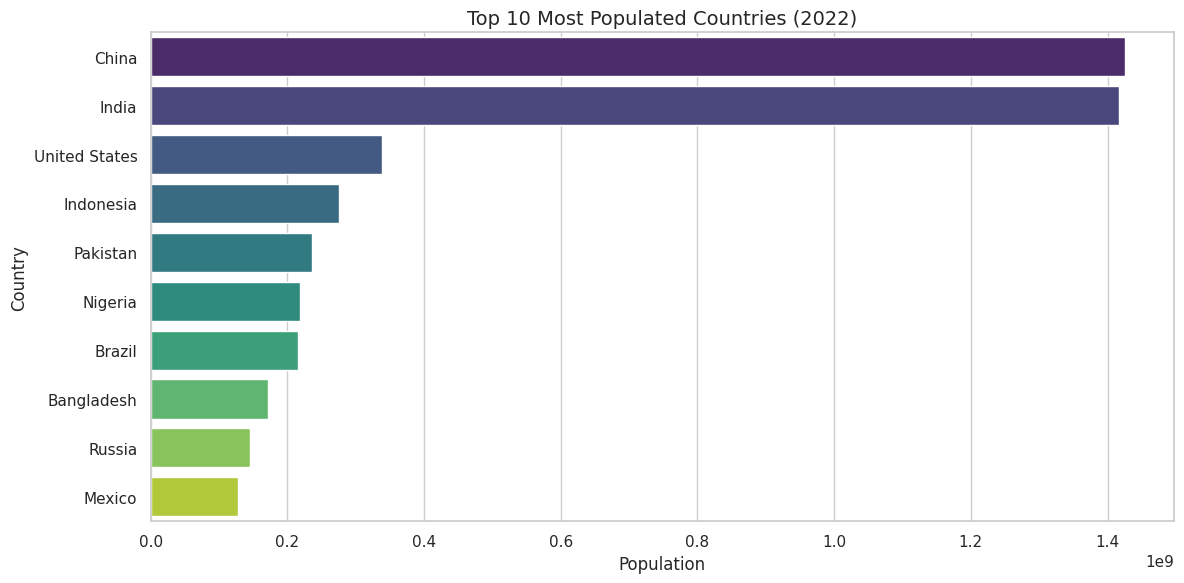

In [ ]:
sns.set(style="whitegrid")
top10 = df.sort_values(by='2022 Population', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='2022 Population', y='Country', data=top10, palette='viridis')
plt.title('Top 10 Most Populated Countries (2022)', fontsize=14)
plt.xlabel('Population')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In 2022, India and China dominate the world population, each with over 1.4 billion people.
Other highly populated countries include the USA, Indonesia, Pakistan, and Nigeria.
These top 10 nations alone make up a significant portion of the global population.

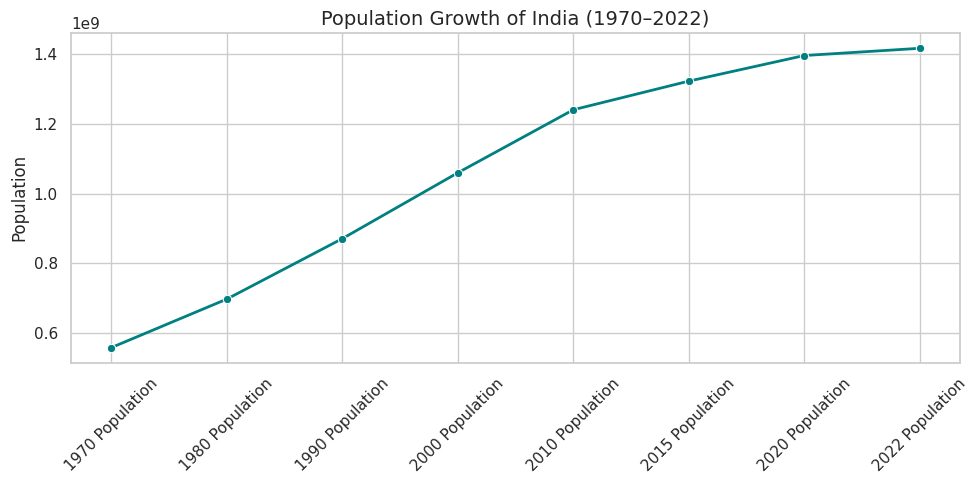

In [ ]:
country = "India"
row = df[df["Country"] == country].iloc[0]

years = ['1970 Population', '1980 Population', '1990 Population', '2000 Population',
         '2010 Population', '2015 Population', '2020 Population', '2022 Population']
pop_values = [row[year] for year in years]


plt.figure(figsize=(10,5))
sns.lineplot(x=years, y=pop_values, marker="o", linewidth=2, color="teal")
plt.title(f"Population Growth of {country} (1970–2022)", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Population")
plt.grid(True)
plt.tight_layout()
plt.show()

India’s population has shown a consistent upward trend from 1970 to 2022.
It grew from around 553 million in 1970 to over 1.4 billion by 2022, showing strong and steady growth each decade.
This makes India one of the fastest-growing large countries in terms of population.

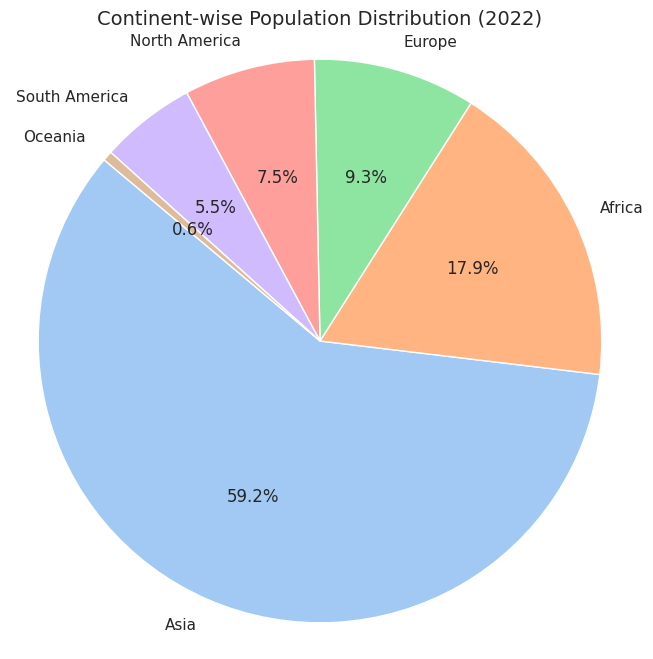

In [ ]:
continent_data = df.groupby('Continent')['2022 Population'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')[0:7]
plt.pie(continent_data, labels=continent_data.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("Continent-wise Population Distribution (2022)", fontsize=14)
plt.axis('equal')
plt.show()


In 2022, Asia holds the largest share of the global population — more than half of the world's people live there.
Africa is also rapidly rising, while continents like Oceania and South America hold a much smaller portion of the population.
This shows how population is unevenly distributed across continents.



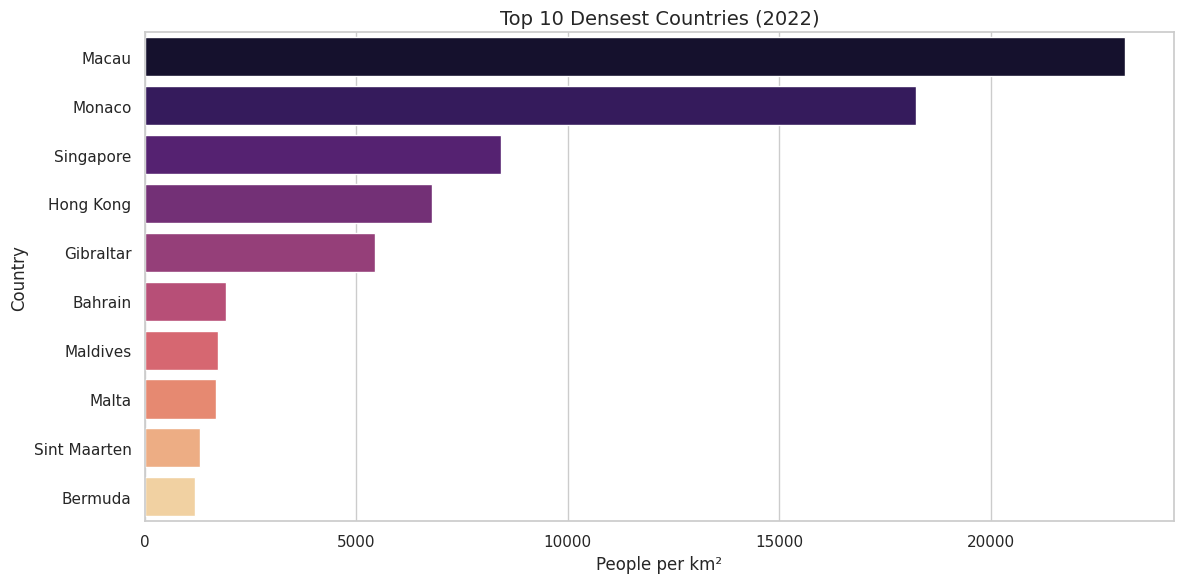

In [ ]:
dense_top10 = df.sort_values(by='Density', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='Density', y='Country', data=dense_top10, palette='magma')
plt.title('Top 10 Densest Countries (2022)', fontsize=14)
plt.xlabel('People per km²')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Countries like Monaco, Singapore, and Bangladesh have the highest population density.
These countries have limited land areas but very high populations, making them extremely crowded.
High density can lead to housing issues, traffic congestion, and strain on public services.

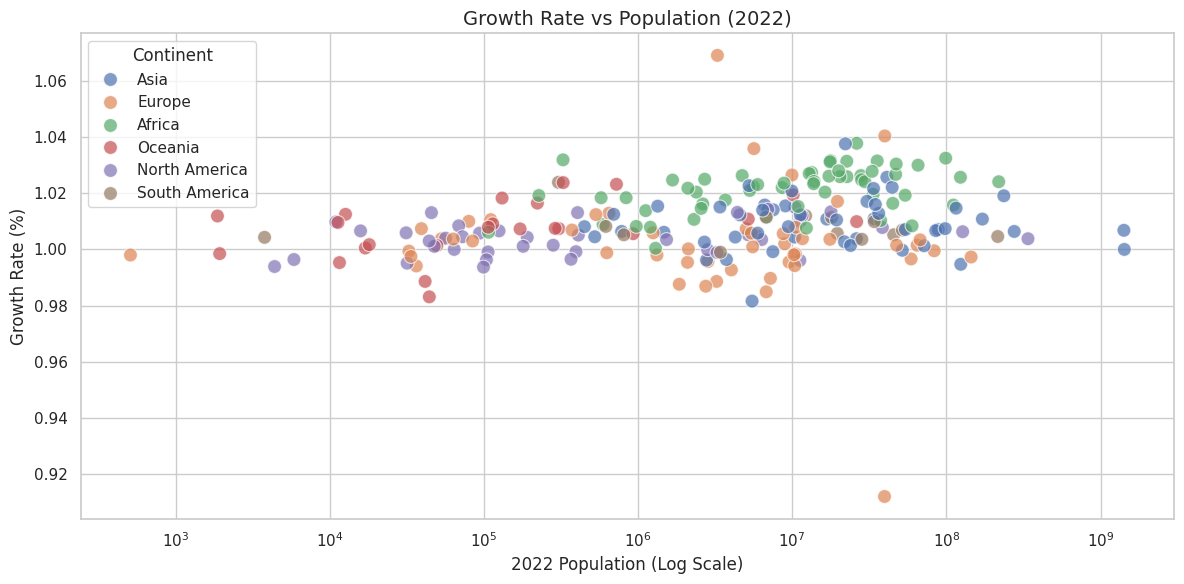

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='2022 Population', y='Growth Rate', hue='Continent', s=100, alpha=0.7)

plt.xscale('log')
plt.title('Growth Rate vs Population (2022)', fontsize=14)
plt.xlabel('2022 Population (Log Scale)')
plt.ylabel('Growth Rate (%)')
plt.legend(title='Continent')
plt.grid(True)
plt.tight_layout()
plt.show()

Most large-population countries like India and China have moderate growth rates, while some smaller countries — especially in Africa — show very high growth rates.
This scatter plot reveals that future population booms are likely to come from smaller, fast-growing nations, not necessarily the already huge ones.

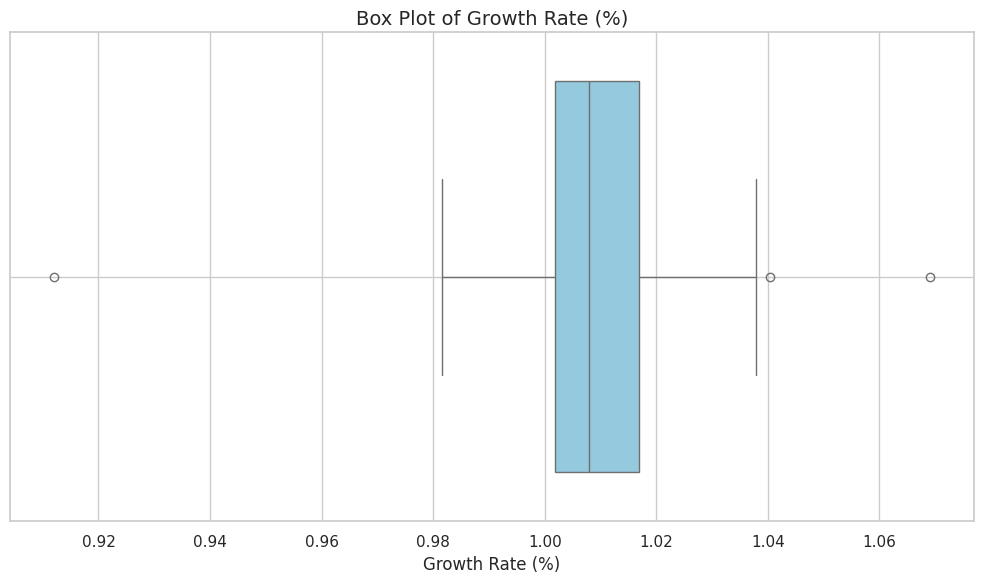

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Growth Rate'], color='skyblue')
plt.title("Box Plot of Growth Rate (%)", fontsize=14)
plt.xlabel("Growth Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()

Most countries have a growth rate between 0% and 2%, which is within a stable range.
However, there are clear outliers — some countries (like Niger, Angola) have growth rates above 3%, indicating very rapid population expansion.
Countries with negative growth may be facing aging populations or emigration.

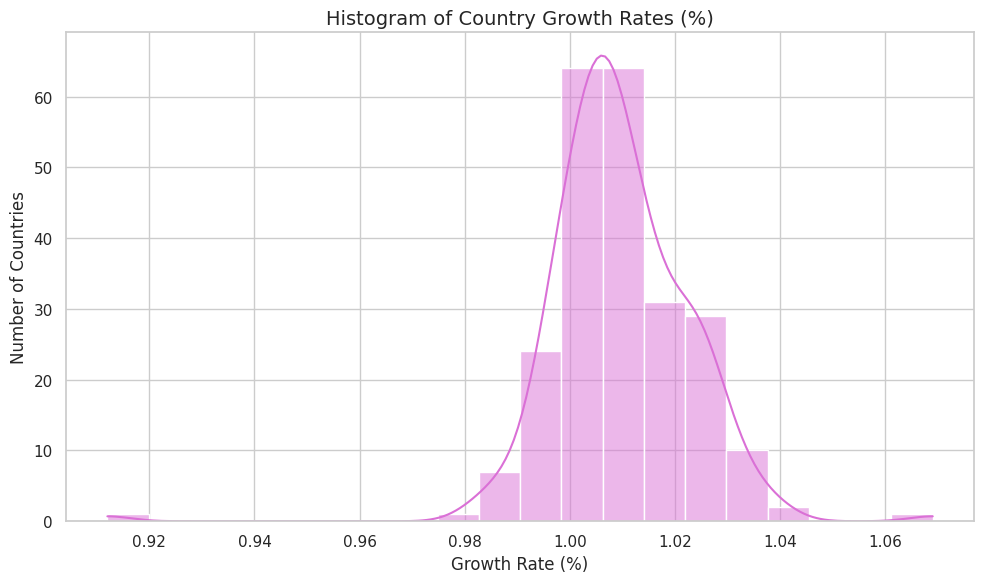

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Growth Rate', bins=20, kde=True, color='orchid')
plt.title("Histogram of Country Growth Rates (%)", fontsize=14)
plt.xlabel("Growth Rate (%)")
plt.ylabel("Number of Countries")
plt.grid(True)
plt.tight_layout()
plt.show()

Most countries have a growth rate between 0.5% and 2%.
Very few countries have negative growth, and only a small number exceed 3%.
The slight right-skew in the histogram shows that while rapid growth is rare, it’s still happening in a few nations (especially in Africa).

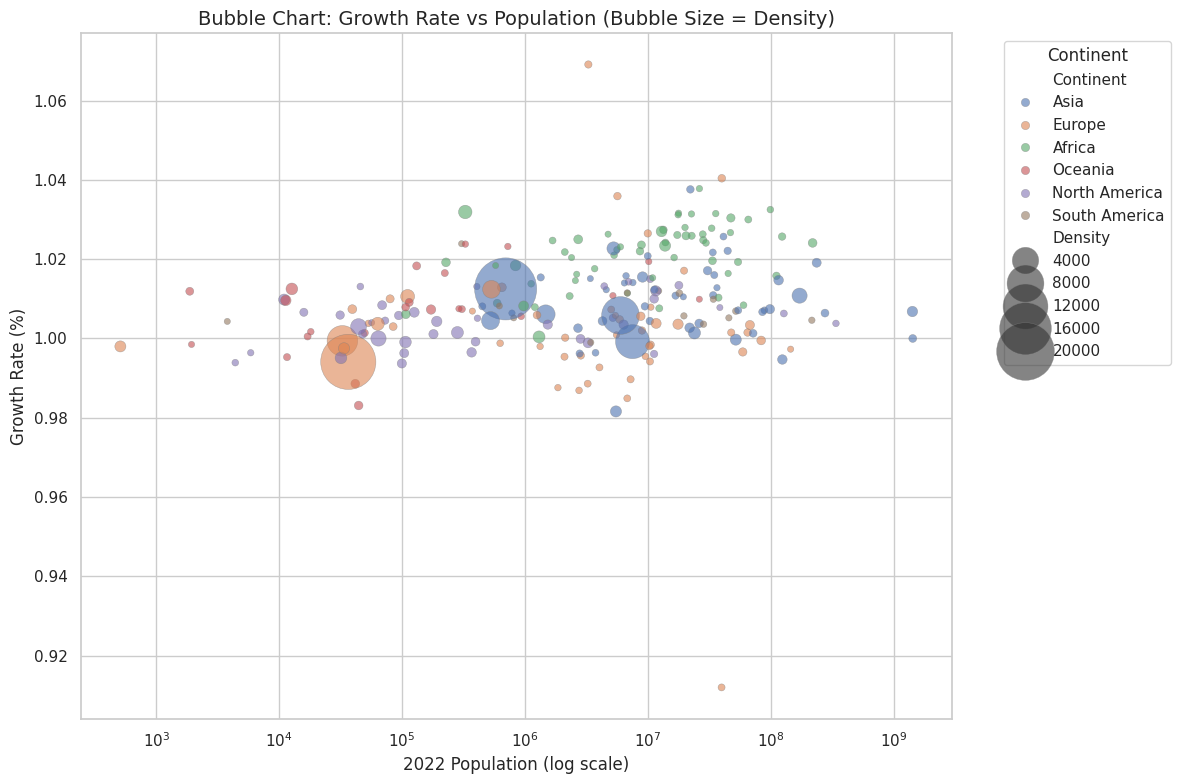

In [ ]:
plt.figure(figsize=(12,8))

bubble = sns.scatterplot(
    data=df,
    x='2022 Population',
    y='Growth Rate',
    size='Density',
    hue='Continent',
    sizes=(20, 2000),
    alpha=0.6,
    edgecolor='gray'
)

plt.xscale('log')
plt.title("Bubble Chart: Growth Rate vs Population (Bubble Size = Density)", fontsize=14)
plt.xlabel("2022 Population (log scale)")
plt.ylabel("Growth Rate (%)")
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Countries like India and Bangladesh show up as large, dense, high-growth bubbles, especially in Asia.
African nations like Niger may have high growth but smaller populations, while some large countries like China have moderate or declining growth.
This chart helps identify hot zones of future population pressure.

In [ ]:
years = ['1970 Population', '1980 Population', '1990 Population',
         '2000 Population', '2010 Population', '2015 Population',
         '2020 Population', '2022 Population']

stacked_data = df.groupby('Continent')[years].sum().T
stacked_data.index = [int(year.split()[0]) for year in stacked_data.index]

<Figure size 1200x600 with 0 Axes>

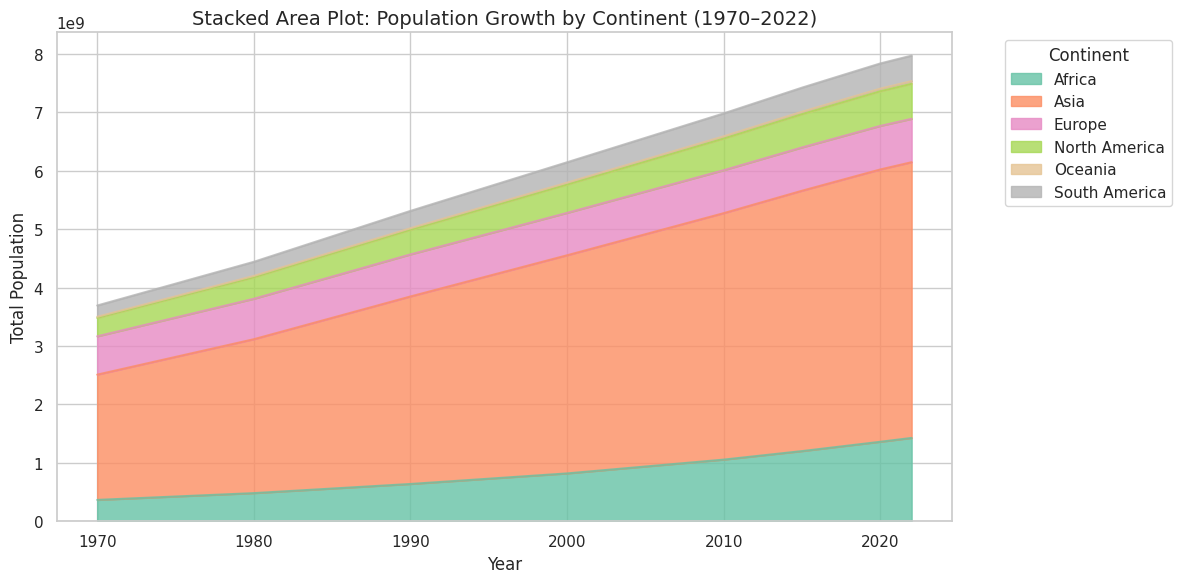

In [ ]:
plt.figure(figsize=(12,6))
stacked_data.plot(kind='area', stacked=True, colormap='Set2', alpha=0.8, figsize=(12,6))

plt.title("Stacked Area Plot: Population Growth by Continent (1970–2022)", fontsize=14)
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend(title='Continent', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

From 1970 to 2022, Asia consistently leads in global population, but Africa’s share has grown rapidly in recent decades.
Europe and Oceania show stable or slower growth, while North America and South America grow moderately.
This shows a shift in population weight toward Africa and Asia in the 21st century.

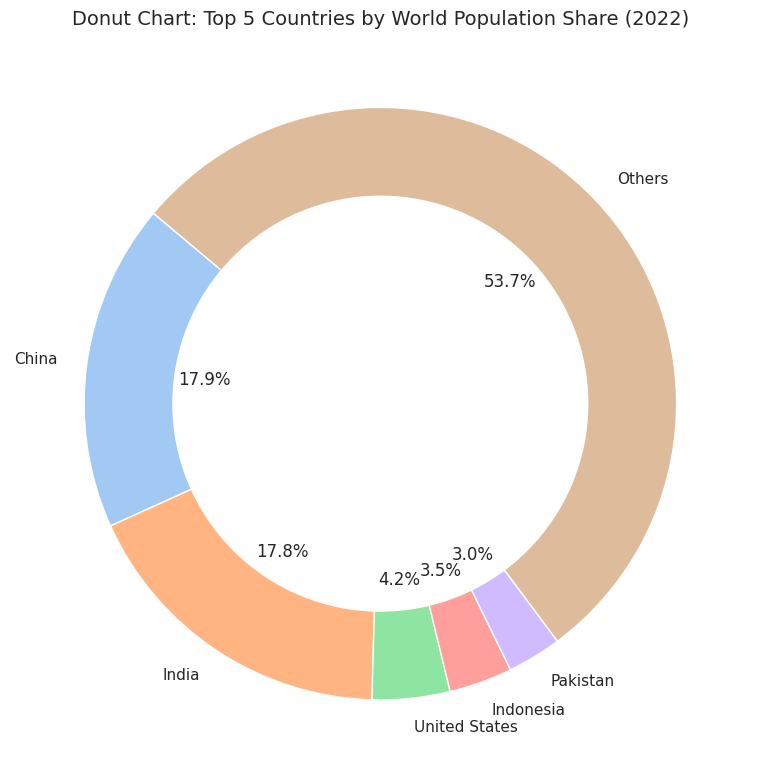

In [ ]:
total_pop = df['2022 Population'].sum()

top5 = df.sort_values(by='2022 Population', ascending=False).head(5)

others_pop = total_pop - top5['2022 Population'].sum()

labels = list(top5['Country']) + ['Others']
sizes = list(top5['2022 Population']) + [others_pop]

colors = sns.color_palette('pastel')[0:6]

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140, wedgeprops={'linewidth': 1, 'edgecolor': 'white'})
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Donut Chart: Top 5 Countries by World Population Share (2022)", fontsize=14)
plt.tight_layout()
plt.show()

In 2022, India and China alone account for over one-third of the global population.
The USA, Indonesia, and Pakistan also appear in the top 5.
Together, these five countries hold a massive share, while the remaining 190+ countries are grouped under "Others."

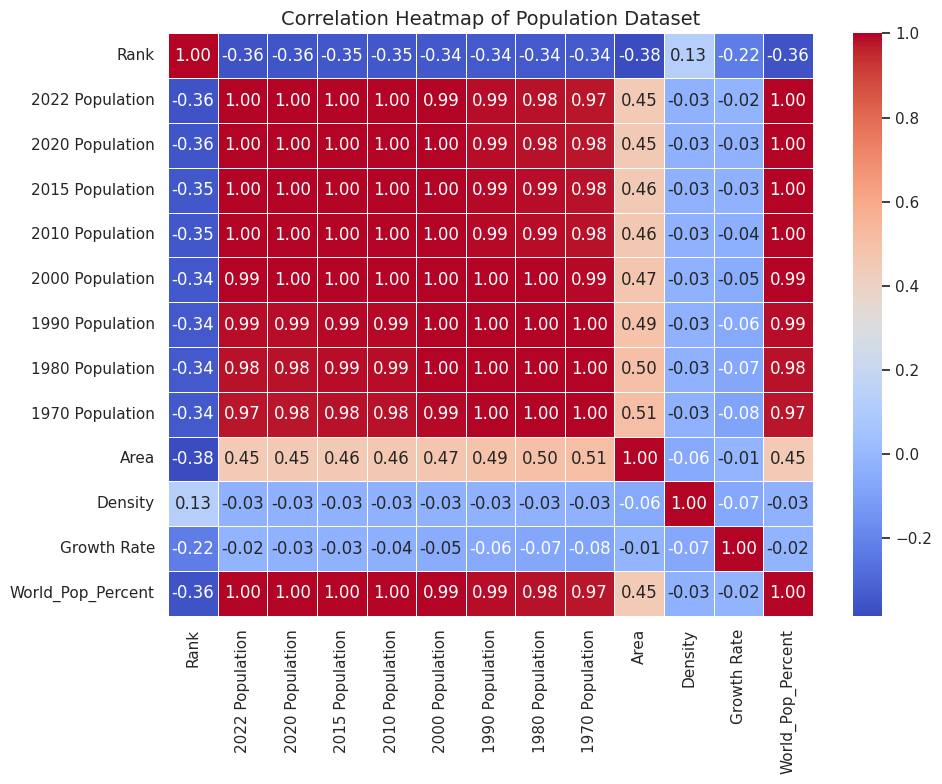

In [ ]:
numeric_df = df.select_dtypes(include='number')

corr = numeric_df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Population Dataset", fontsize=14)
plt.tight_layout()
plt.show()

The population columns from different years are strongly positively correlated, showing steady growth over time.
Density and growth rate may show weak or no correlation, suggesting they’re independent in this dataset.
A heatmap helps reveal relationships you might miss otherwise.

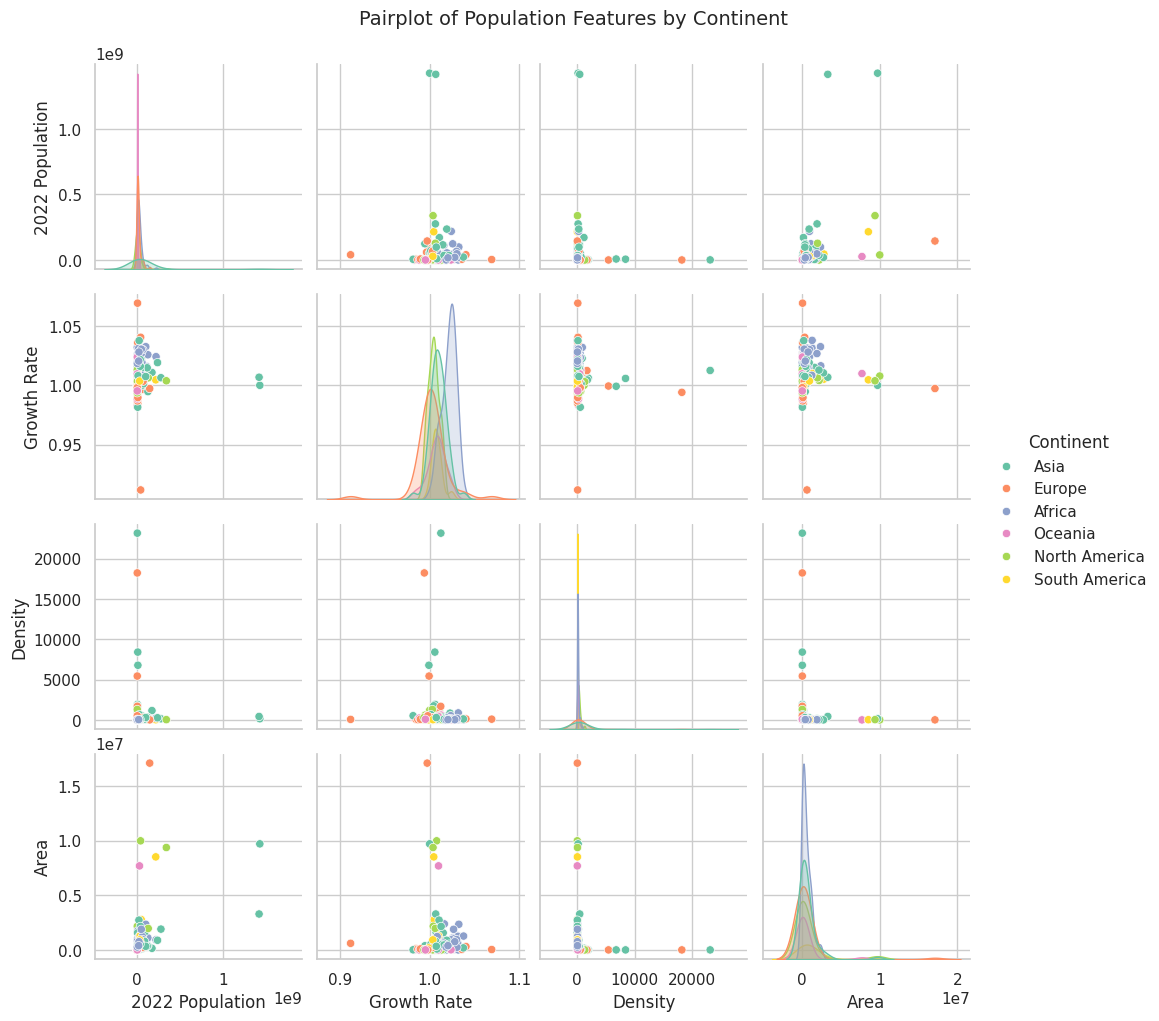

In [ ]:
pair_df = df[['2022 Population', 'Growth Rate', 'Density', 'Area']].copy()
pair_df = pair_df.dropna()

pair_df['Continent'] = df['Continent']

sns.pairplot(pair_df, hue='Continent', palette='Set2', diag_kind='kde')
plt.suptitle("Pairplot of Population Features by Continent", y=1.02, fontsize=14)
plt.show()

The pairplot shows some continent-level clustering, especially for Density and Growth Rate.
Africa shows high growth and medium population, while Europe tends to have low growth and moderate density.
Useful for pattern recognition before modeling!

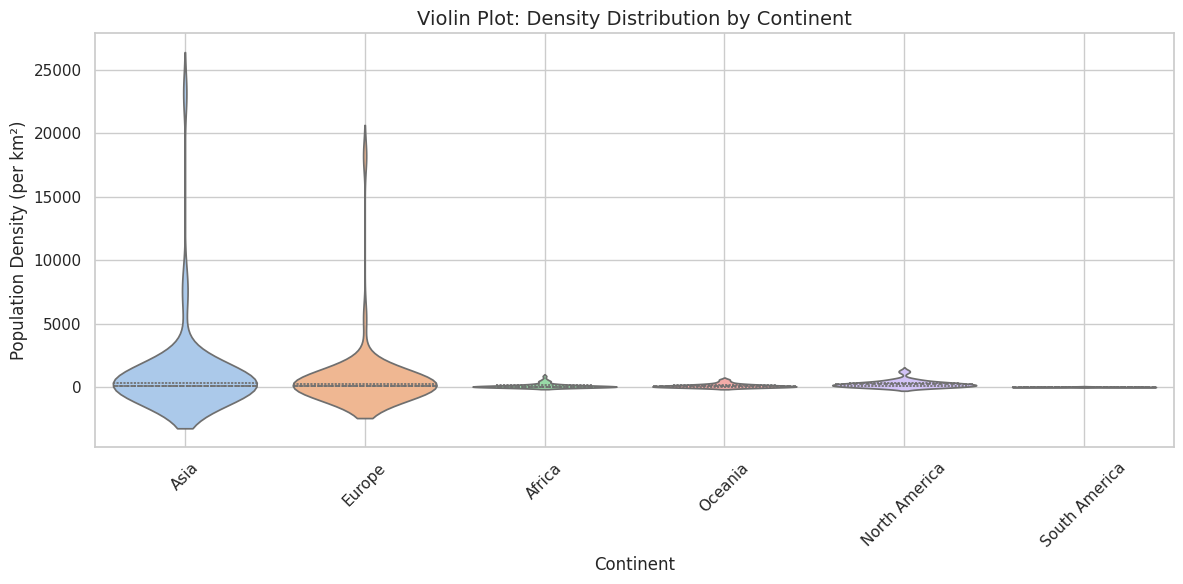

In [ ]:
plt.figure(figsize=(12,6))
sns.violinplot(x='Continent', y='Density', data=df, palette='pastel', inner='quartile')
plt.title("Violin Plot: Density Distribution by Continent", fontsize=14)
plt.ylabel("Population Density (per km²)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

Asia and Europe show wide variation in density, with Asia having some extreme high-density outliers.
Oceania and South America are more balanced with lower overall densities.
The violin plot helps spot concentration vs spread for each continent.

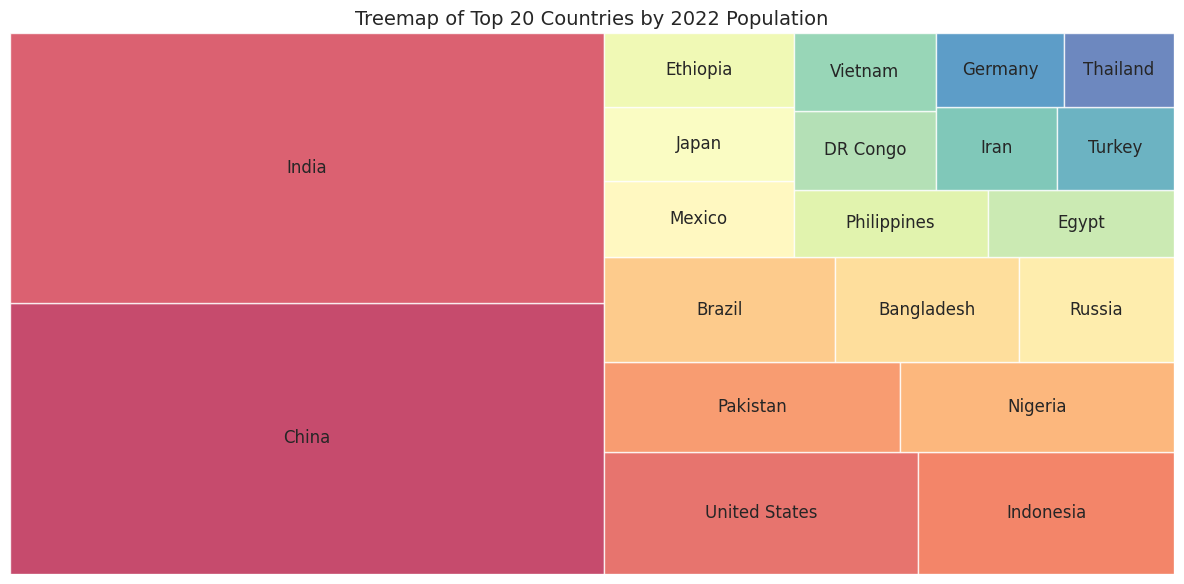

In [ ]:
!pip install squarify
import squarify

top20 = df.sort_values(by='2022 Population', ascending=False).head(20)

plt.figure(figsize=(12,6))
squarify.plot(sizes=top20['2022 Population'],
              label=top20['Country'],
              color=sns.color_palette('Spectral', 20),
              alpha=0.8)
plt.title("Treemap of Top 20 Countries by 2022 Population", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

India and China take up the largest space in the treemap, each holding over 1.4 billion people.
Other countries like the USA, Indonesia, and Brazil also occupy large boxes.
The treemap helps show global population imbalance in a very intuitive way.

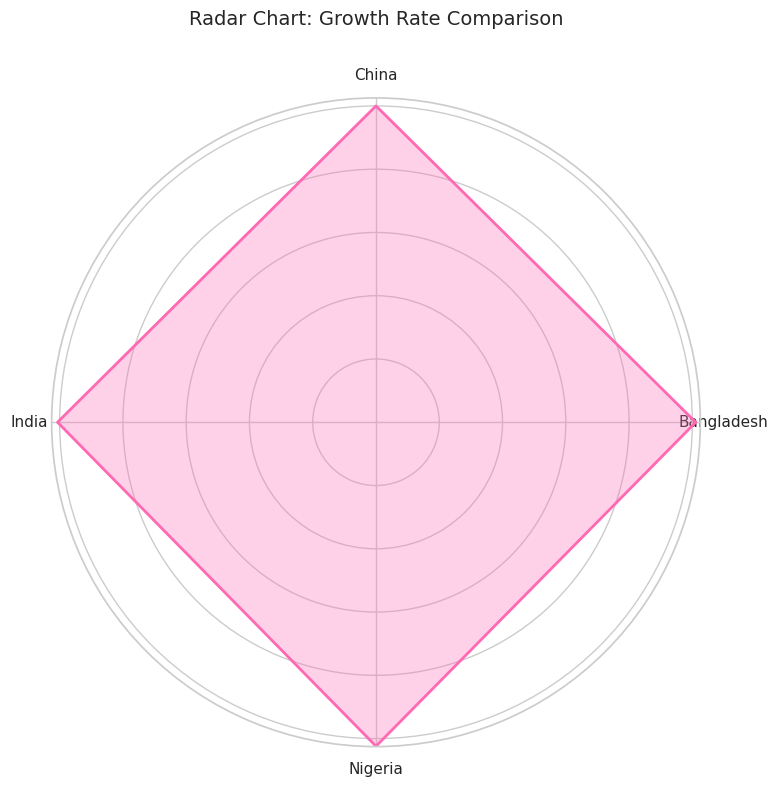

In [ ]:
selected_countries = ['India', 'China', 'Nigeria', 'USA', 'Bangladesh']
radar_df = df[df['Country'].isin(selected_countries)][['Country', 'Growth Rate']]
radar_df = radar_df.set_index('Country')

labels = radar_df.index.tolist()
values = radar_df['Growth Rate'].tolist()
values += values[:1]

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(8,8))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, color='hotpink', linewidth=2, linestyle='solid')
ax.fill(angles, values, color='hotpink', alpha=0.3)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Radar Chart: Growth Rate Comparison", y=1.1, fontsize=14)
ax.set_yticklabels([])
plt.tight_layout()
plt.show()

Nigeria and Bangladesh show higher growth rates, indicating fast population expansion.
China and USA have much slower growth, possibly approaching stagnation.
The radar chart makes it easy to spot who’s growing fastest at a glance.



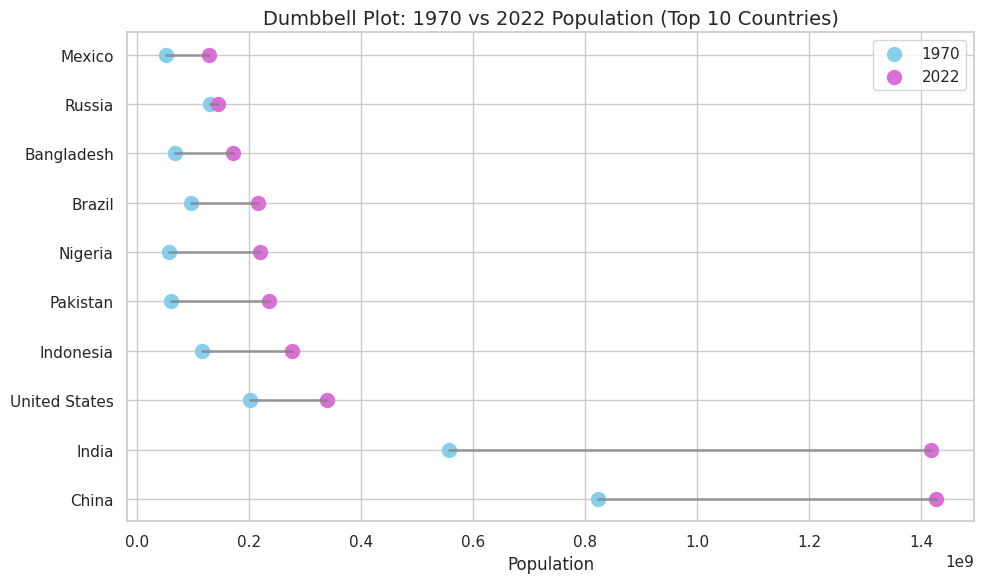

In [ ]:
top10 = df.sort_values(by='2022 Population', ascending=False).head(10)

plt.figure(figsize=(10, 6))

for i, row in top10.iterrows():
    plt.plot(
        [row['1970 Population'], row['2022 Population']],
        [row['Country'], row['Country']],
        color='gray', linewidth=2, alpha=0.7
    )
    plt.scatter(row['1970 Population'], row['Country'], color='skyblue', s=100, label='1970' if i == top10.index[0] else "")
    plt.scatter(row['2022 Population'], row['Country'], color='orchid', s=100, label='2022' if i == top10.index[0] else "")

plt.xlabel("Population")
plt.title("Dumbbell Plot: 1970 vs 2022 Population (Top 10 Countries)", fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

India shows the largest growth jump from 1970 to 2022, followed by countries like Pakistan, Indonesia, and Bangladesh.
China’s growth is strong but more stable, while countries like Russia and Mexico show smaller increases.
The dumbbell plot highlights how some countries rapidly expanded, while others had slower demographic shifts.

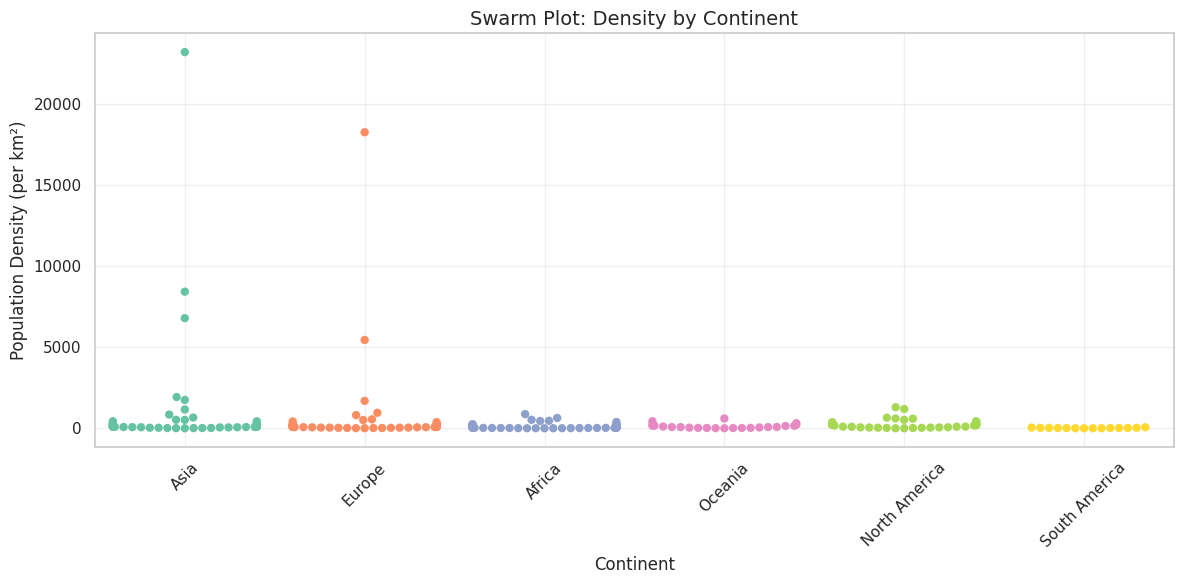

In [ ]:
plt.figure(figsize=(12,6))
sns.swarmplot(
    data=df,
    x='Continent',
    y='Density',
    size=6,
    hue='Continent',
    palette='Set2',
    dodge=False
)

plt.title("Swarm Plot: Density by Continent", fontsize=14)
plt.ylabel("Population Density (per km²)")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.legend([],[], frameon=False)
plt.show()


Asia and Europe have extreme outliers — likely Monaco, Singapore, Bangladesh, etc.

Africa, Oceania, and South America show more balanced distributions, with density mostly under 500.

Most countries fall below 1,000 density, with a few ultra-urban nations standing out.

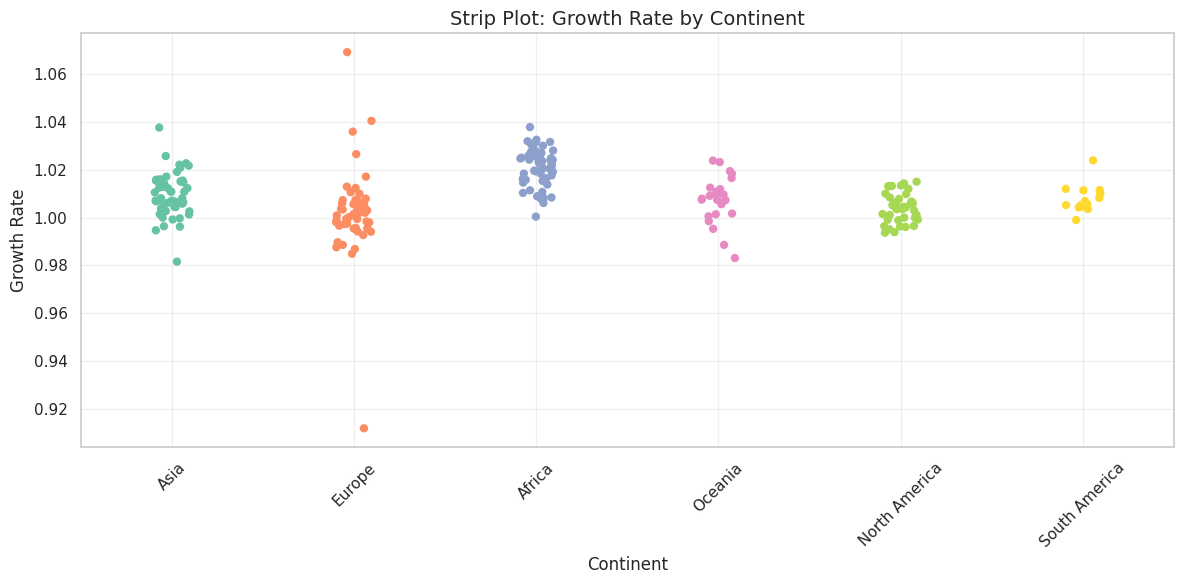

In [ ]:
plt.figure(figsize=(12,6))
sns.stripplot(
    data=df,
    x='Continent',
    y='Growth Rate',
    jitter=True,
    palette='Set2',
    size=6
)

plt.title("Strip Plot: Growth Rate by Continent", fontsize=14)
plt.ylabel("Growth Rate")
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

 Africa shows consistent high growth rates — tightly clustered above 1.02.

 Europe has a few outliers, including some very low growth, possibly negative.

 Asia is centered around 1.01–1.02, with a tighter spread.

 Oceania and Americas are more balanced, mostly within 1.00–1.02.

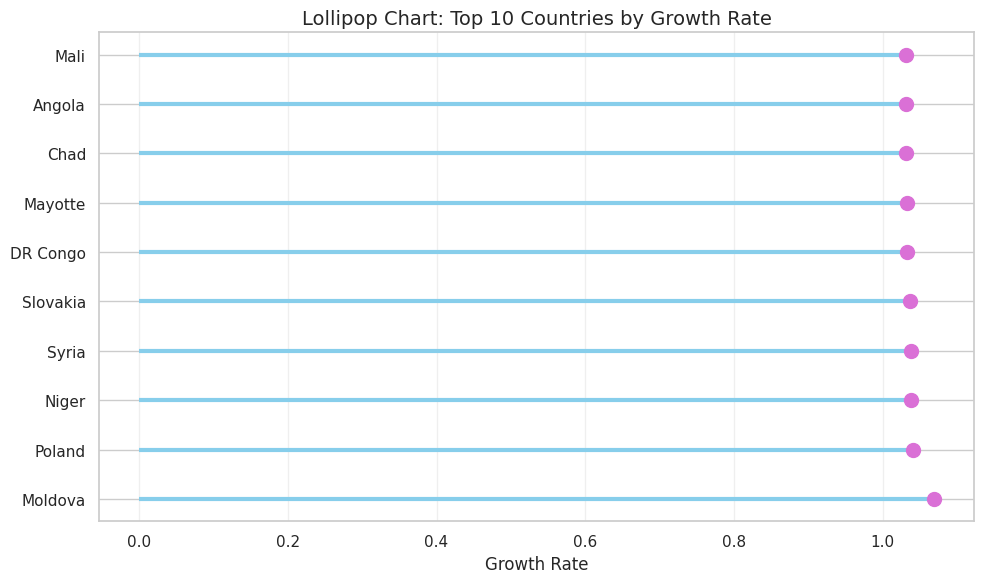

In [ ]:
top_growth = df.sort_values(by='Growth Rate', ascending=False).head(10)

plt.figure(figsize=(10,6))

plt.hlines(y=top_growth['Country'], xmin=0, xmax=top_growth['Growth Rate'], color='skyblue', linewidth=3)

plt.plot(top_growth['Growth Rate'], top_growth['Country'], 'o', color='orchid', markersize=10)

plt.xlabel("Growth Rate")
plt.title("Lollipop Chart: Top 10 Countries by Growth Rate", fontsize=14)
plt.grid(True, axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

Countries like Mali, Angola, Chad, and DR Congo lead with the highest growth rates

Most of them are in Africa, indicating regions with young populations and high fertility

Interesting outliers like Slovakia, Poland, and Moldova might have had temporary spikes (or data quirks) — worth double-checking

The visual makes it super easy to compare who’s rising fastest

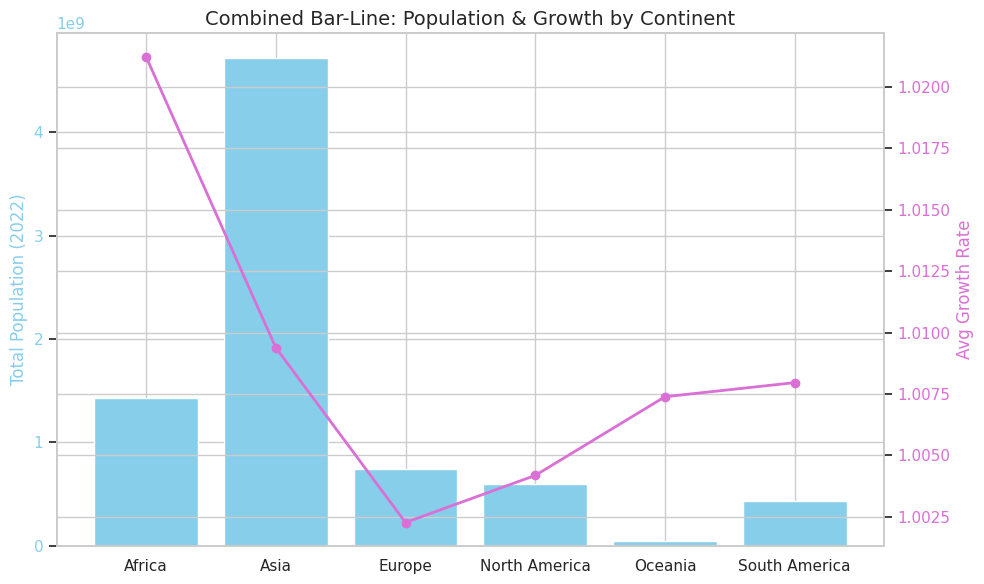

In [ ]:
cont_df = df.groupby('Continent').agg({
    '2022 Population': 'sum',
    'Growth Rate': 'mean'
}).reset_index()

fig, ax1 = plt.subplots(figsize=(10, 6))

bar = ax1.bar(cont_df['Continent'], cont_df['2022 Population'], color='skyblue', label='2022 Population')
ax1.set_ylabel('Total Population (2022)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
line = ax2.plot(cont_df['Continent'], cont_df['Growth Rate'], color='orchid', marker='o', linewidth=2, label='Avg Growth Rate')
ax2.set_ylabel('Avg Growth Rate', color='orchid')
ax2.tick_params(axis='y', labelcolor='orchid')

plt.title("Combined Bar-Line: Population & Growth by Continent", fontsize=14)
fig.tight_layout()
plt.show()

Asia = biggest population (check)

Africa = fastest average growth rate (check)

Europe = lowest population growth (check)

Highlights that big size ≠ fast growth (Asia is huge, but Africa grows faster)

In [ ]:
!pip install plotly
import plotly.express as px

sun_df = df[['Continent', 'Country', '2022 Population']]

fig = px.sunburst(
    sun_df,
    path=['Continent', 'Country'],
    values='2022 Population',
    title="Sunburst Chart: World Population by Continent & Country (2022)"
)
fig.show()

The chart shows that Asia’s bulk population comes from a few giants like China & India, while Africa’s distribution is more spread across countries.
Europe and Oceania have much smaller country slices, highlighting both size and spread differences.



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 69.0 MB/s eta 0:00:00


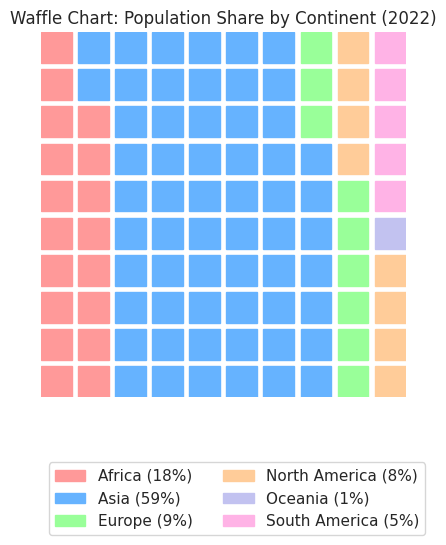

In [ ]:
!pip install pywaffle
from pywaffle import Waffle
import matplotlib.pyplot as plt

pop_share = df.groupby('Continent')['2022 Population'].sum()
total = pop_share.sum()
pop_percent = round((pop_share / total) * 100).astype(int)

fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=pop_percent,
    colors=["#ff9999", "#66b3ff", "#99ff99", "#ffcc99", "#c2c2f0", "#ffb3e6"],
    labels=[f"{k} ({v}%)" for k, v in pop_percent.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': 2},
    title={'label': 'Waffle Chart: Population Share by Continent (2022)', 'loc': 'center'},
    figsize=(10, 6)
)
plt.show()

Asia dominates the waffle, filling over 50 blocks.
Africa and Europe follow, while Oceania takes just one.
This chart offers a super friendly visual of how humans are spread across Earth.



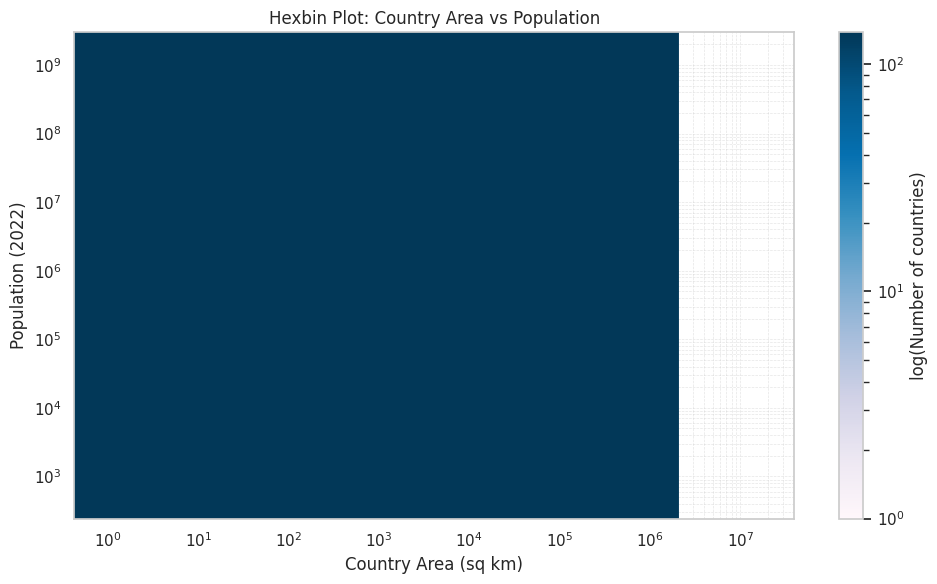

In [ ]:
plt.figure(figsize=(10,6))
plt.hexbin(
    df['Area'], df['2022 Population'],
    gridsize=40,
    cmap='PuBu',
    bins='log'
)

plt.colorbar(label='log(Number of countries)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Country Area (sq km)')
plt.ylabel('Population (2022)')
plt.title('Hexbin Plot: Country Area vs Population')
plt.grid(True, which="both", ls="--", linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()

Most countries fall into the low-area, mid-population cluster.
Countries with extreme area or population (like China, Russia) are rare.
The log-log scale reveals hidden data density better than normal scatter.


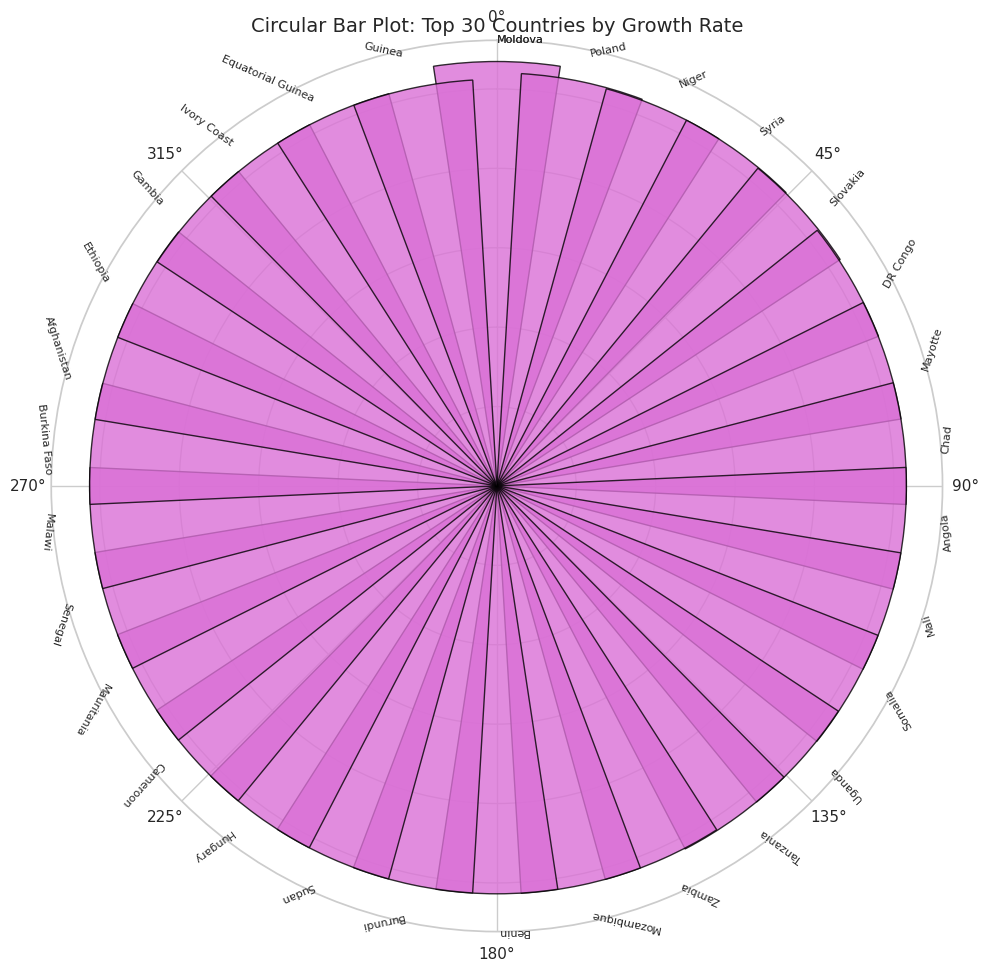

In [ ]:
data = df.sort_values(by='Growth Rate', ascending=False).head(30)

labels = data['Country']
stats = data['Growth Rate']
num_vars = len(labels)

angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
stats = list(stats)
labels = list(labels)

stats += stats[:1]
angles += angles[:1]
labels += labels[:1]

fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'polar': True})
ax.bar(angles[:-1], stats[:-1], width=0.3, color='orchid', alpha=0.8, edgecolor='black')

for angle, label in zip(angles, labels):
    rotation = np.degrees(angle)
    alignment = "right" if angle > np.pi else "left"
    ax.text(angle, max(stats)*1.05, label, size=8, ha=alignment, va='center', rotation=rotation)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_title("Circular Bar Plot: Top 30 Countries by Growth Rate", size=14)
ax.set_yticklabels([])
plt.tight_layout()
plt.show()

Bold outward bars like Niger, Angola, and Chad show explosive growth.
Countries like Moldova sit closer to the core — meaning stable or slow-growing.
The circular layout makes the visual memorable and engaging for presentations.



In [ ]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations="Country",
    locationmode="country names",
    color="Density",
    color_continuous_scale="Viridis",
    title="Choropleth Map: World Population Density (2022)",
)

fig.show()

The darkest greens glow over high-density countries like Bangladesh, Monaco, and Singapore.
Lighter purples signal sparse nations like Mongolia, Australia, and Canada.
A global lens on how unevenly we occupy the Earth

In [ ]:
import plotly.express as px

fig = px.parallel_coordinates(
    df,
    dimensions=["2022 Population", "Area", "Density", "Growth Rate"],
    color="Growth Rate",
    color_continuous_scale=px.colors.diverging.Tealrose,
    title="Parallel Coordinates Plot: Country-wise Feature Comparison",
)

fig.show()

Countries with large populations and small areas clearly form steep curves in density.
Fast-growing countries pop in brighter color, often seen on lower-area and higher-growth tracks.
Patterns show how land, people, and expansion relate per country.



In [ ]:
df_clean = df[['Country', 'Area', '2022 Population', 'Growth Rate']].dropna()

fig = px.scatter_3d(
    df_clean,
    x='Area',
    y='2022 Population',
    z='Growth Rate',
    color='Growth Rate',
    hover_name='Country',
    title='3D Scatter Plot: Area vs Population vs Growth Rate',
    color_continuous_scale='Plasma',
    size_max=15
)

fig.update_layout(scene = dict(
                    xaxis_title='Area (km²)',
                    yaxis_title='Population (2022)',
                    zaxis_title='Growth Rate'),
                  margin=dict(l=0, r=0, b=0, t=40))

fig.show()

Countries like India and China float up with high population & mid-area,
while small, fast-growing countries rise in Growth Rate axis
It’s easy to spot low-area but fast-growth countries in the upper side of the Z-axis!



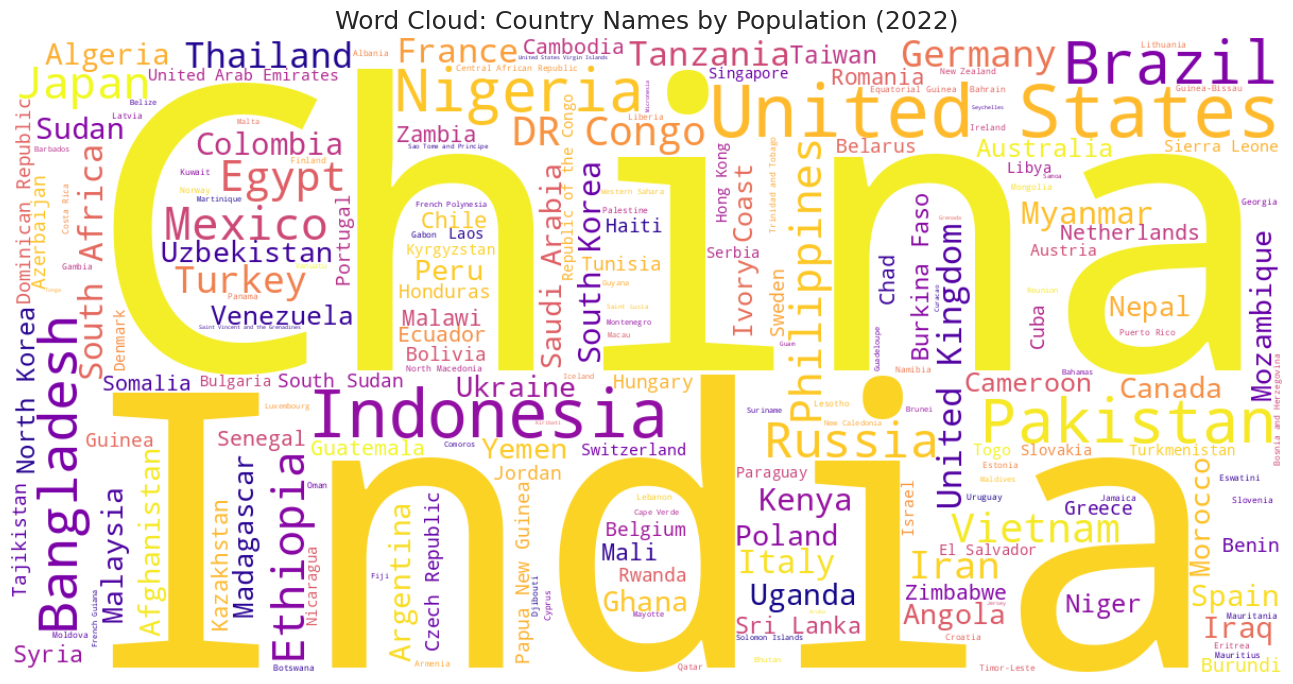

In [ ]:
from wordcloud import WordCloud

word_freq = dict(zip(df['Country'], df['2022 Population']))

wordcloud = WordCloud(width=1200, height=600, background_color='white', colormap='plasma')\
    .generate_from_frequencies(word_freq)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud: Country Names by Population (2022)', fontsize=18)
plt.tight_layout()
plt.show()

The largest, boldest names — like India, China, and USA — stand out like giants.
Smaller countries appear faint, but still represented.
This cloud gives an emotional + visual weight to population scale.

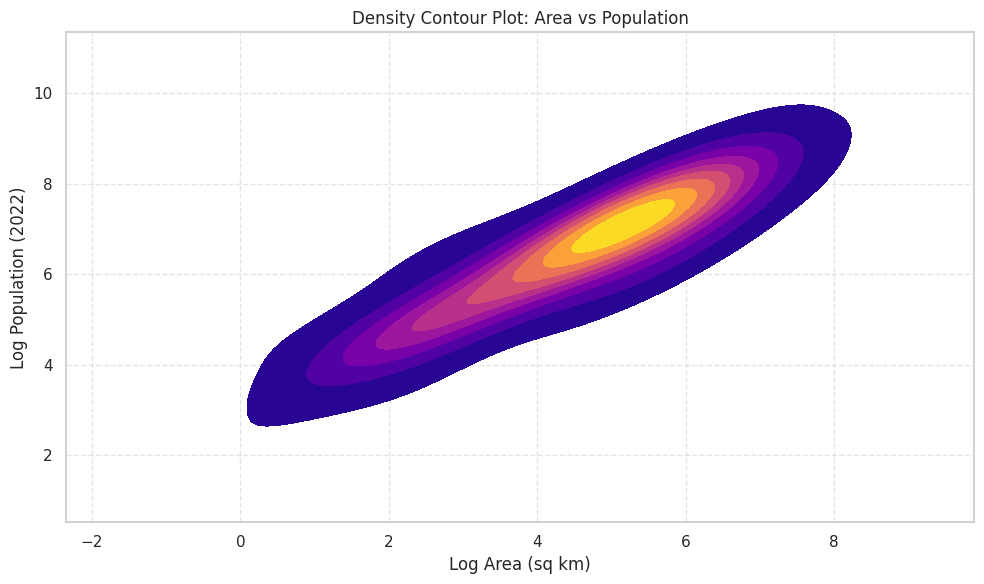

In [ ]:
df_clean = df[['Area', '2022 Population']].dropna()
df_clean['log_area'] = np.log10(df_clean['Area'] + 1)
df_clean['log_population'] = np.log10(df_clean['2022 Population'] + 1)

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df_clean,
    x='log_area',
    y='log_population',
    fill=True,
    cmap='plasma',
    bw_adjust=1.5,
    thresh=0.05
)

plt.xlabel("Log Area (sq km)")
plt.ylabel("Log Population (2022)")
plt.title("Density Contour Plot: Area vs Population")
plt.grid(True, which="both", linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

A thick glow near the middle shows that most countries have moderate area and population.
Sparse blobs on the edges represent outliers like Russia (huge area) or Monaco (tiny area, dense pop).
This plot gives a final soft-focus lens over the entire distribution.



In [ ]:
top10 = df.sort_values(by='2022 Population', ascending=False).head(10)

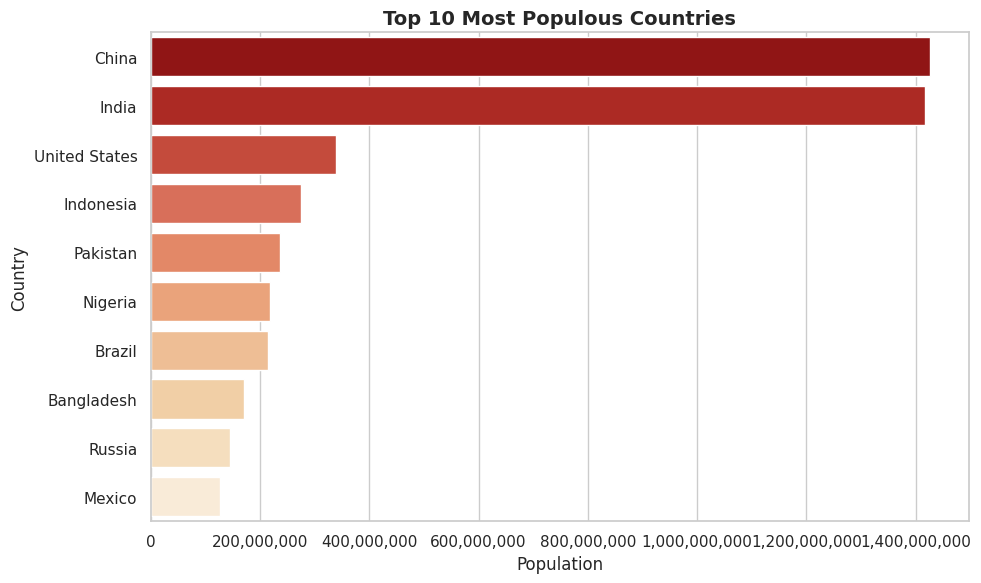

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(
    data=top10,
    y='Country',  # horizontal bars
    x='2022 Population',
    palette='OrRd_r'  # warm gradient from orange to red reversed
)

plt.title('Top 10 Most Populous Countries', fontsize=14, fontweight='bold')
plt.xlabel('Population')
plt.ylabel('Country')

import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

The top 10 most populous countries in the world include India, China, the United States, Indonesia, Pakistan, Nigeria, Brazil, Bangladesh, Russia, and Mexico. India and China each have a population over 1 billion, dominating the global population chart. The rest of the countries in this list also contribute significantly, each with hundreds of millions of people. Together, these 10 countries account for a substantial portion of the world’s population.



In [ ]:
least_populated = df.loc[df.groupby('Continent')['2022 Population'].idxmin()]

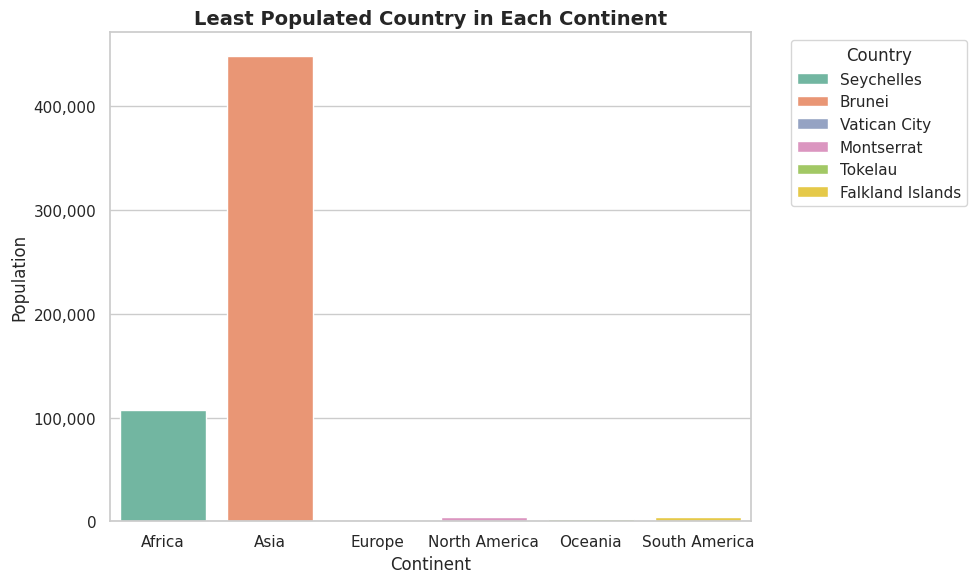

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(
    data=least_populated,
    x='Continent',
    y='2022 Population',
    hue='Country',
    dodge=False,
    palette='Set2'
)

plt.title('Least Populated Country in Each Continent', fontsize=14, fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('Population')

import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In each continent, there exists a country with a significantly low population. For instance, Vatican City in Europe has fewer than 1,000 people, making it the smallest in the world. Tuvalu in Oceania and Saint Kitts & Nevis in North America also have very small populations. These least populated countries, though small in size, add to the rich diversity of their respective continents.



In [ ]:
avg_population = df.groupby('Continent')['2022 Population'].mean().reset_index()

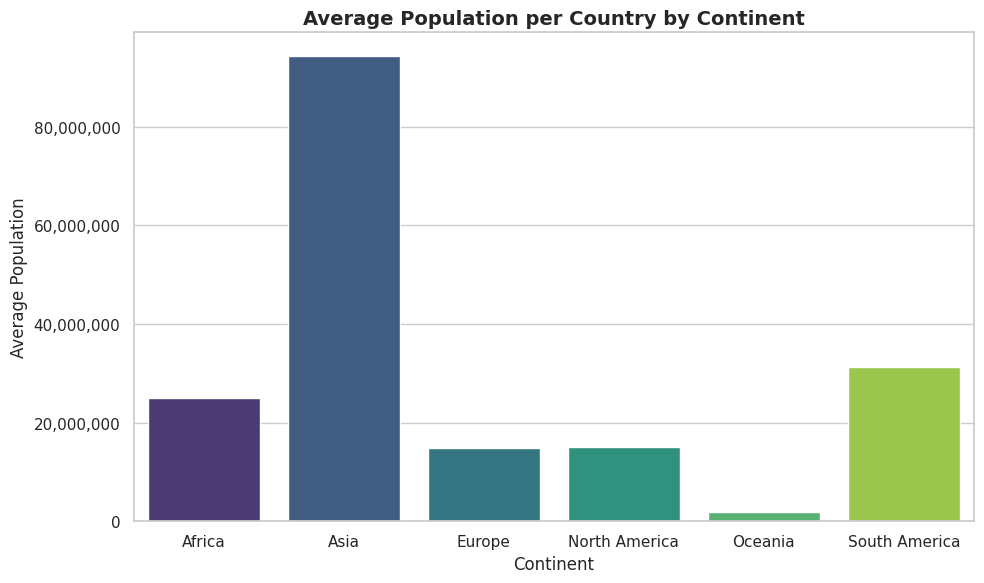

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

sns.barplot(
    data=avg_population,
    x='Continent',
    y='2022 Population',
    palette='viridis'
)

plt.title('Average Population per Country by Continent', fontsize=14, fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('Average Population')

import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

When analyzing the average population per country across continents, Asia stands out with the highest average, due to the presence of extremely populous nations like India and China. In contrast, Oceania and Europe have a much lower average per country, highlighting the presence of many smaller nations with lower population counts. This metric helps balance the understanding of population distribution beyond just totals.



In [ ]:
df['Population Density'] = df['2022 Population'] / df['Area']
top_density = df.sort_values(by='Population Density', ascending=False).head(7)

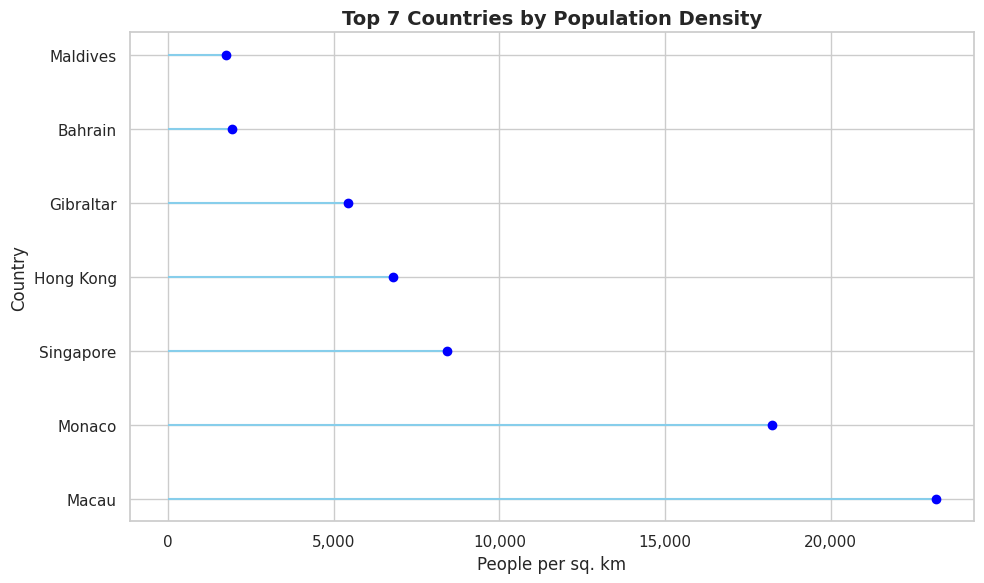

In [ ]:
plt.figure(figsize=(10, 6))

plt.hlines(y=top_density['Country'], xmin=0, xmax=top_density['Population Density'], color='skyblue')
plt.plot(top_density['Population Density'], top_density['Country'], "o", color='blue')

plt.title('Top 7 Countries by Population Density', fontsize=14, fontweight='bold')
plt.xlabel('People per sq. km')
plt.ylabel('Country')

import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

The countries with the highest population density include Macau, Monaco, Bahrain, and Singapore, with thousands of people living in each square kilometer. These countries manage to accommodate a huge population in very limited land area, highlighting the urban pressure and compactness of human settlement.

In [ ]:
df['Pop Change'] = df['2022 Population'] - df['2020 Population']
growing = df.sort_values(by='Pop Change', ascending=False).head(5)
shrinking = df.sort_values(by='Pop Change').head(5)
change_df = pd.concat([growing, shrinking])

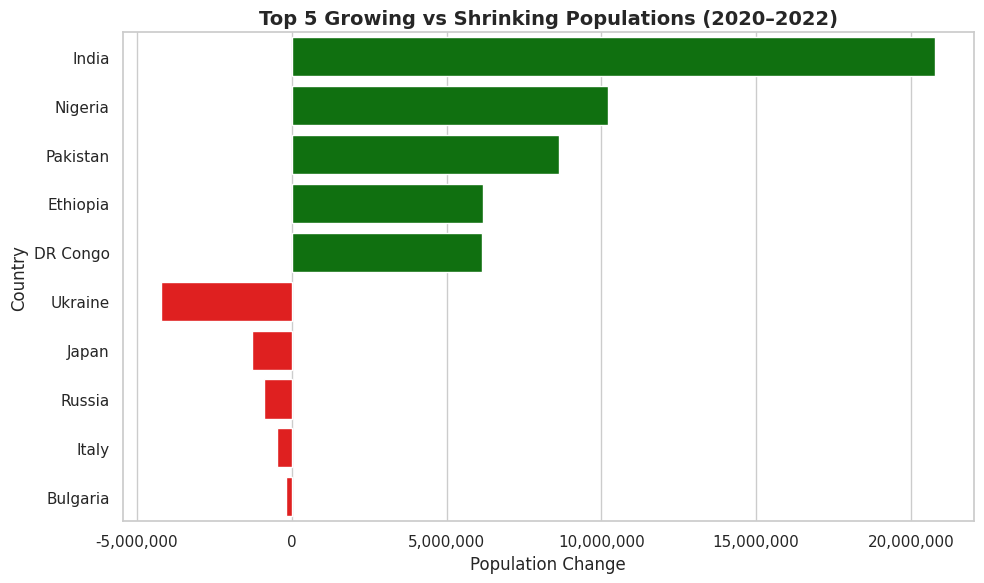

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(
    data=change_df,
    y='Country',
    x='Pop Change',
    palette=['green' if x > 0 else 'red' for x in change_df['Pop Change']]
)

plt.title('Top 5 Growing vs Shrinking Populations (2020–2022)', fontsize=14, fontweight='bold')
plt.xlabel('Population Change')
plt.ylabel('Country')

import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

Between 2020 and 2022, countries like India, Nigeria, and Pakistan saw significant population growth. On the other hand, countries such as Japan, Ukraine, and Bulgaria experienced a noticeable population decline. These shifts indicate differing birth rates, migration trends, and demographic policies across regions.

In [ ]:
bins = [0, 10_000_000, 50_000_000, 100_000_000, float('inf')]
labels = ['Under 10M', '10M–50M', '50M–100M', 'Over 100M']
df['Pop Range'] = pd.cut(df['2022 Population'], bins=bins, labels=labels)

In [ ]:
range_count = df.groupby(['Continent', 'Pop Range']).size().reset_index(name='Count')

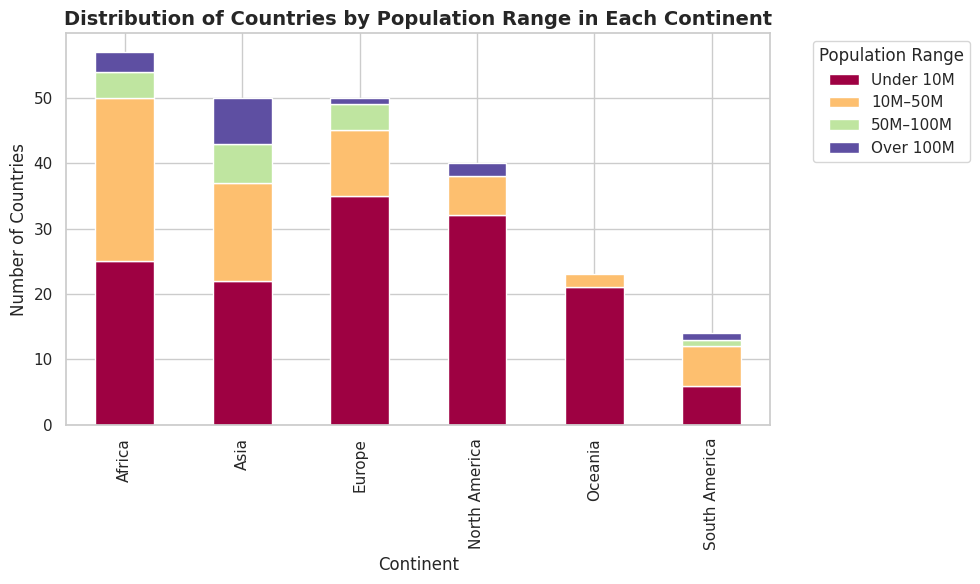

In [ ]:
pivot_data = range_count.pivot(index='Continent', columns='Pop Range', values='Count').fillna(0)

pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Spectral')

plt.title('Distribution of Countries by Population Range in Each Continent', fontsize=14, fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('Number of Countries')

plt.legend(title='Population Range', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

When countries are grouped by population range, most countries across continents fall into the under 50 million population group. However, Asia and Africa have more countries in the Over 100 million range due to populous nations like India, China, Nigeria, and Egypt. This classification helps visualize how population is distributed not just by continent but also by scale.



In [ ]:
continent_total = df.groupby('Continent')['2022 Population'].transform('sum')
df['Continent Share (%)'] = (df['2022 Population'] / continent_total) * 100

In [ ]:
top5_share = df.sort_values(by='Continent Share (%)', ascending=False).head(5)

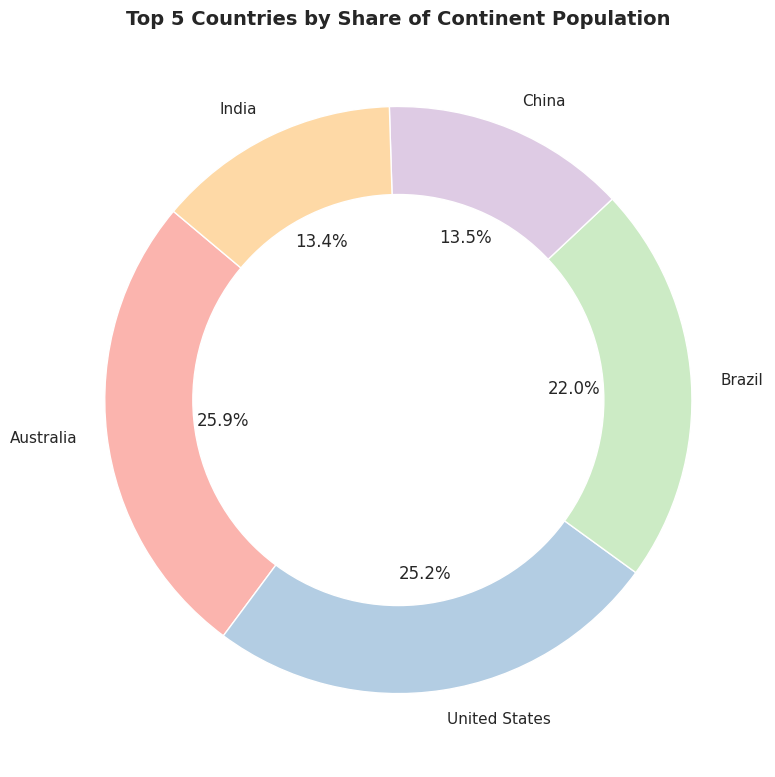

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    top5_share['Continent Share (%)'],
    labels=top5_share['Country'],
    autopct='%.1f%%',
    startangle=140,
    colors=plt.cm.Pastel1.colors,
    wedgeprops=dict(width=0.4)
)

plt.title('Top 5 Countries by Share of Continent Population', fontsize=14, fontweight='bold')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

plt.tight_layout()
plt.show()

Among all countries, India and China together dominate Asia’s population, each contributing a major share. In North America, the United States holds the largest population share, significantly more than neighboring countries. Brazil accounts for the largest portion of South America’s population, while Australia dominates Oceania, which is otherwise made up of several small island nations.

This insight highlights how a single country can represent a massive portion of its continent’s population, shaping regional demographics and resource needs.




In [ ]:
top10 = df.sort_values(by='2022 Population', ascending=False).head(10)

In [ ]:
heat_df = top10[['Country', '2022 Population', 'Area']]
heat_df = heat_df.set_index('Country')

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
heat_df_scaled = pd.DataFrame(scaler.fit_transform(heat_df),
                              index=heat_df.index,
                              columns=heat_df.columns)

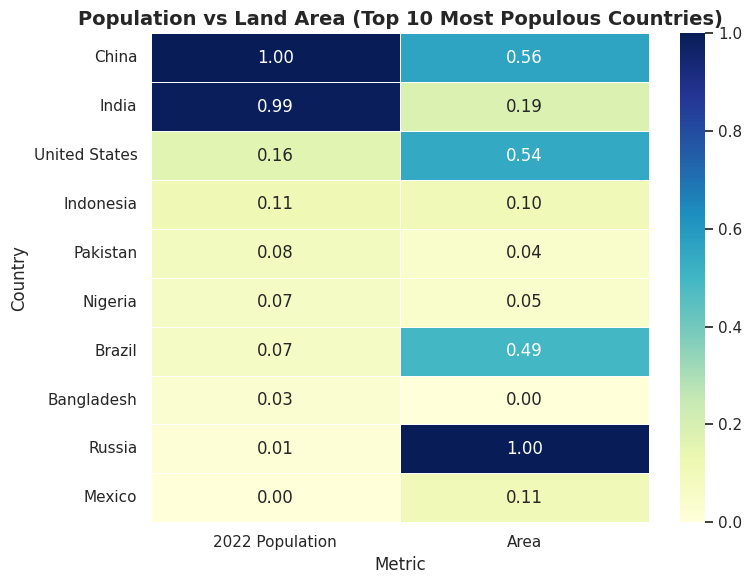

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(
    heat_df_scaled,
    annot=True,
    cmap='YlGnBu',
    linewidths=0.5,
    fmt=".2f"
)
plt.title('Population vs Land Area (Top 10 Most Populous Countries)', fontsize=14, fontweight='bold')
plt.xlabel('Metric')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

Among the top 10 most populous countries, some have a large land area (like the USA or China) while others manage large populations in smaller spaces (like Bangladesh or Indonesia). This contrast highlights the variation in population density, where some countries accommodate millions in compact areas while others spread over vast land.



In [ ]:
top50 = df.sort_values(by='2022 Population', ascending=False).head(50)

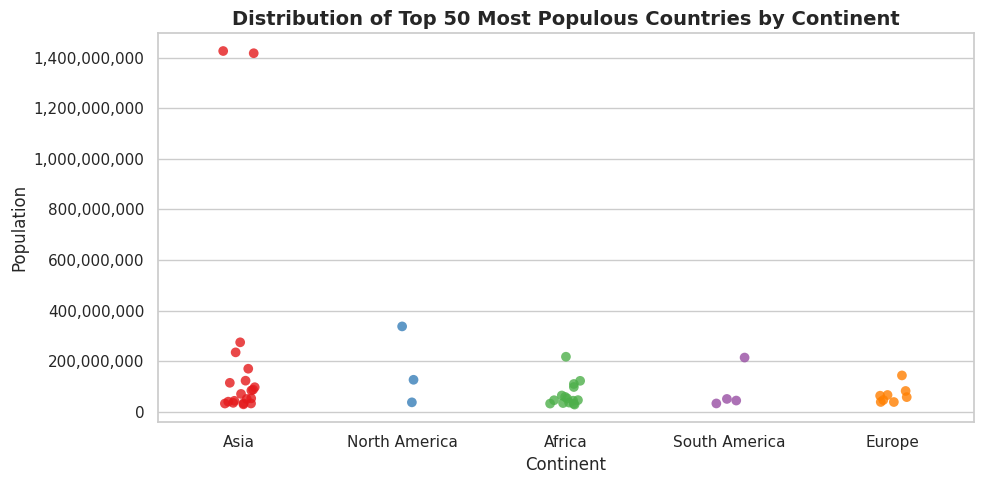

In [ ]:
plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")

sns.stripplot(
    data=top50,
    x='Continent',
    y='2022 Population',
    jitter=True,
    size=7,
    palette='Set1',
    alpha=0.8
)

plt.title('Distribution of Top 50 Most Populous Countries by Continent', fontsize=14, fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('Population')

import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

Among the top 50 most populous countries in the world, Asia holds the majority, followed by Africa and the Americas. This strip plot clearly shows a dense cluster of high-population countries concentrated in Asia, reflecting both the sheer number of countries and the large populations within them. Europe and Oceania contribute fewer entries, highlighting regional disparities.



In [ ]:
selected = df[df['Country'].isin([
    'India', 'China', 'Bangladesh', 'Russia', 'United States',
    'Australia', 'Japan', 'United Kingdom'
])].copy()

selected['Pop Density'] = selected['2022 Population'] / selected['Area']

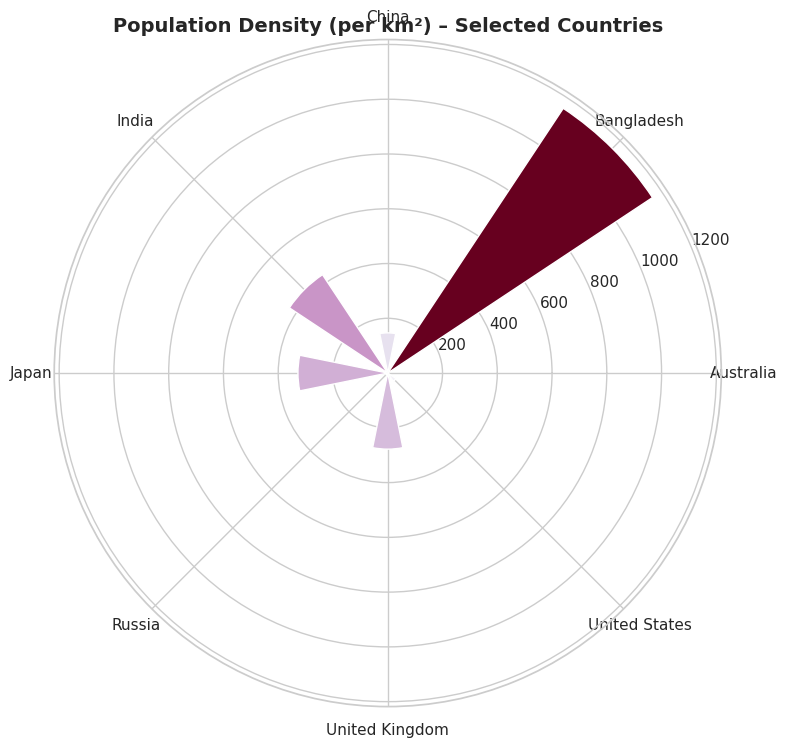

In [ ]:
labels = selected['Country']
values = selected['Pop Density']
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False)

values = np.append(values.values, values.values[0])
angles = np.append(angles, angles[0])
labels = labels.tolist() + [labels.iloc[0]]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'projection': 'polar'})
bars = ax.bar(angles[:-1], values[:-1], width=0.4, color=plt.cm.PuRd(values[:-1] / max(values[:-1])))

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels[:-1])

plt.title('Population Density (per km²) – Selected Countries', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

Countries like Bangladesh, India, Japan, and the UK show extremely high population density, meaning a large number of people live in relatively smaller land areas. In contrast, countries like Russia and Australia have vast land but comparatively lower population density. This polar chart emphasizes how densely packed or sparsely spread people are across different nations.



In [ ]:
df['Pop Density'] = df['2022 Population'] / df['Area']

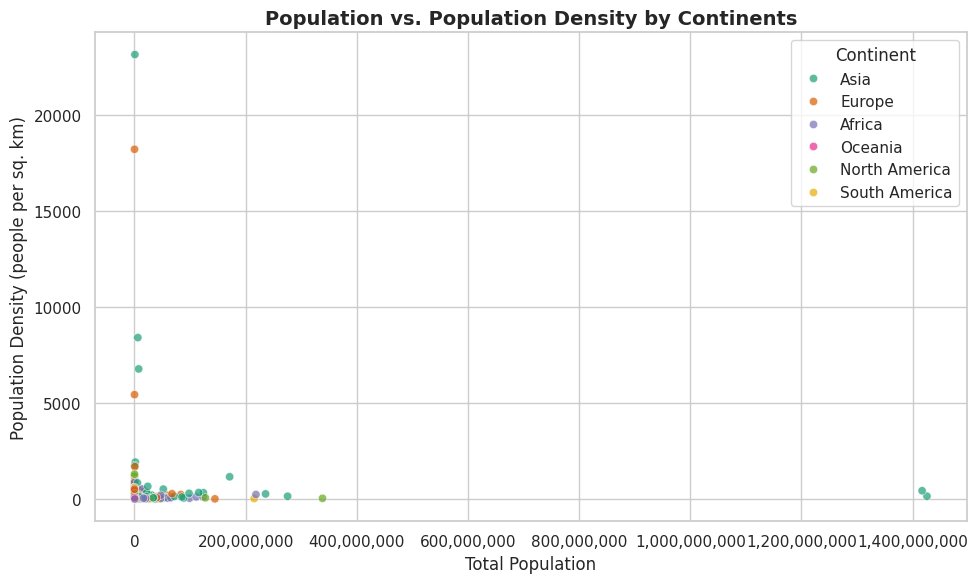

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.scatterplot(
    data=df,
    x='2022 Population',
    y='Pop Density',
    hue='Continent',
    palette='Dark2',
    alpha=0.7
)

plt.title('Population vs. Population Density by Continents', fontsize=14, fontweight='bold')
plt.xlabel('Total Population')
plt.ylabel('Population Density (people per sq. km)')

import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

This scatter plot reveals that a high total population does not always mean high population density. For example, Asia have massive populations, but continents like Americas have far higher population densities. Meanwhile, Oceania has a moderate population but very low density due to its vast land area.

This shows how geographic space plays a huge role in how people are distributed.

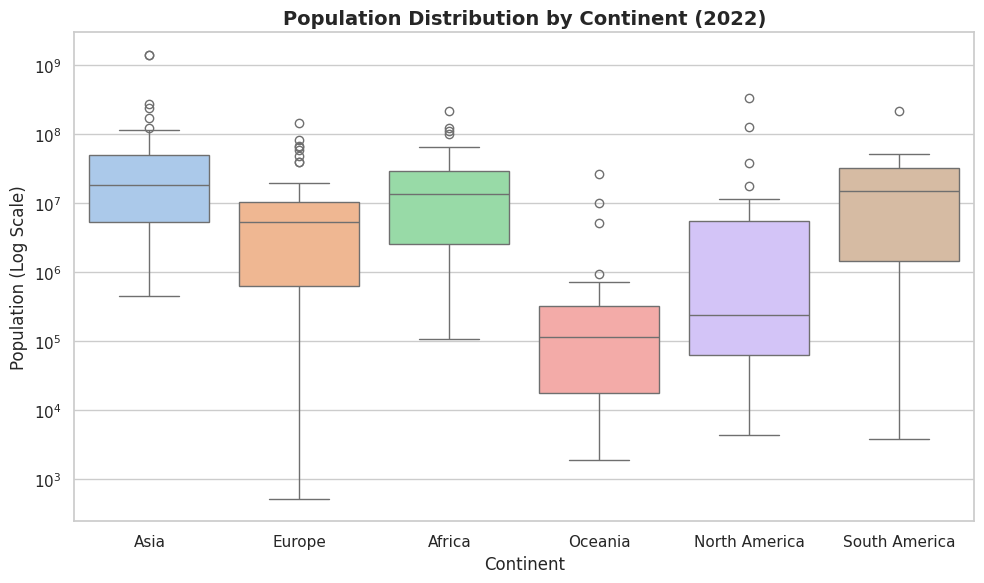

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.boxplot(
    data=df,
    x='Continent',
    y='2022 Population',
    palette='pastel',
    showfliers=True
)

plt.yscale('log')

plt.title('Population Distribution by Continent (2022)', fontsize=14, fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('Population (Log Scale)')

plt.tight_layout()
plt.show()

This box plot shows how population sizes vary within each continent. Asia has the highest median population and a wide range — due to countries like India and China being far above the rest. Oceania and Europe show tighter, smaller distributions.

The presence of outliers like Nigeria in Africa or Brazil in South America also reveals regional giants. This plot helps visualize both spread and extremes in population values.



In [ ]:
continent_counts = df['Continent'].value_counts().reset_index()
continent_counts.columns = ['Continent', 'Country Count']

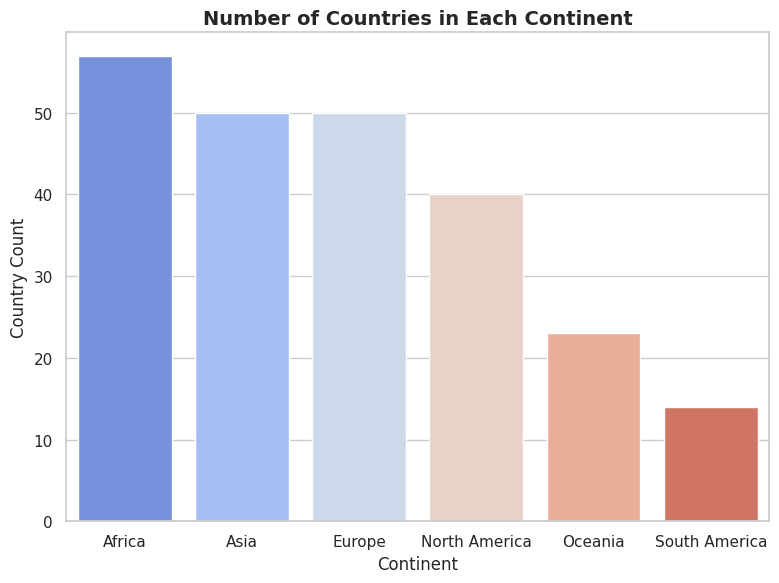

In [ ]:
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
sns.barplot(
    data=continent_counts,
    x='Continent',
    y='Country Count',
    palette='coolwarm'
)

plt.title('Number of Countries in Each Continent', fontsize=14, fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('Country Count')

plt.tight_layout()
plt.show()

Africa has the highest number of countries among all continents, followed by Asia and Europe. This count plot highlights how political boundaries differ vastly across continents. While Oceania and South America have fewer countries, Africa’s diversity in national borders stands out clearly.

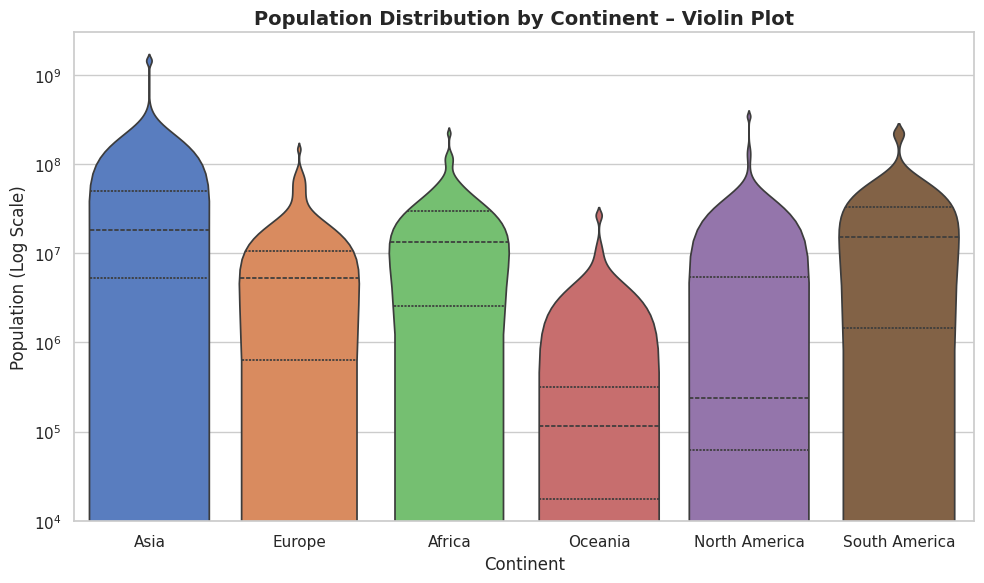

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.violinplot(
    data=df,
    x='Continent',
    y='2022 Population',
    palette='muted',
    scale='width',
    inner='quartile'
)

plt.yscale('log')

plt.title('Population Distribution by Continent – Violin Plot', fontsize=14, fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('Population (Log Scale)')

plt.tight_layout()
plt.show()

The violin plot reveals that Asia has a wide and dense population distribution, with a long upper tail due to India and China. Africa shows a strong spread with many low-to-mid population countries. Oceania appears the most compressed, reflecting its small, uniform country sizes. This chart helps understand how tightly or widely spread population values are within each continent.

In [ ]:
df['Pop Density'] = df['2022 Population'] / df['Area']

In [ ]:
top_density = df.sort_values(by='Pop Density', ascending=False).head(10)

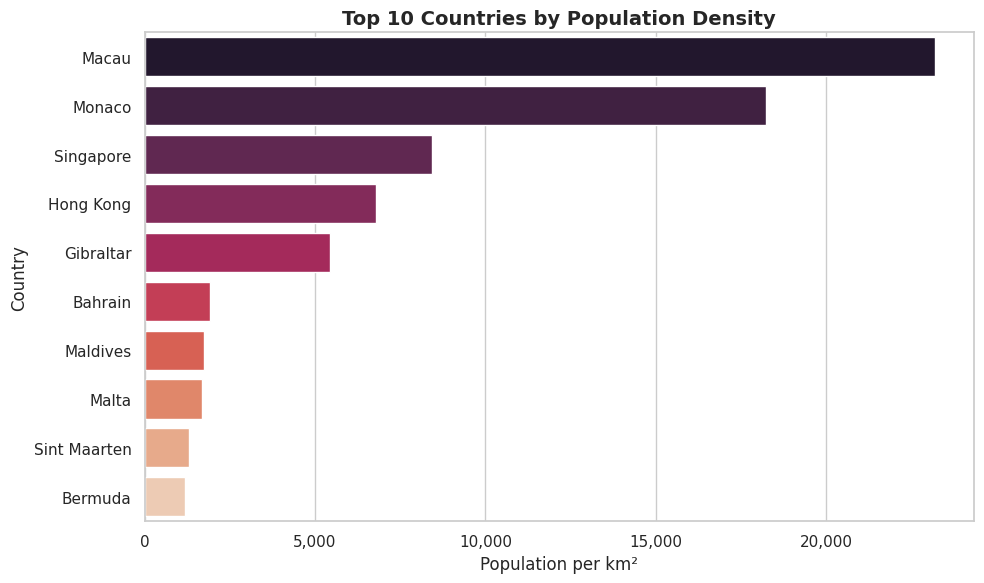

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(
    data=top_density,
    y='Country',
    x='Pop Density',
    palette='rocket'
)

plt.title('Top 10 Countries by Population Density', fontsize=14, fontweight='bold')
plt.xlabel('Population per km²')
plt.ylabel('Country')

# Format x-axis
import matplotlib.ticker as ticker
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

The top 10 most densely populated countries include Macau, Monaco, Singapore, Gibraltar and Hong Kong, where thousands of people live within just 1 square kilometer. These countries face unique challenges related to urban planning, infrastructure pressure, and limited space. This metric provides a critical perspective beyond total population — it shows how packed people actually are.



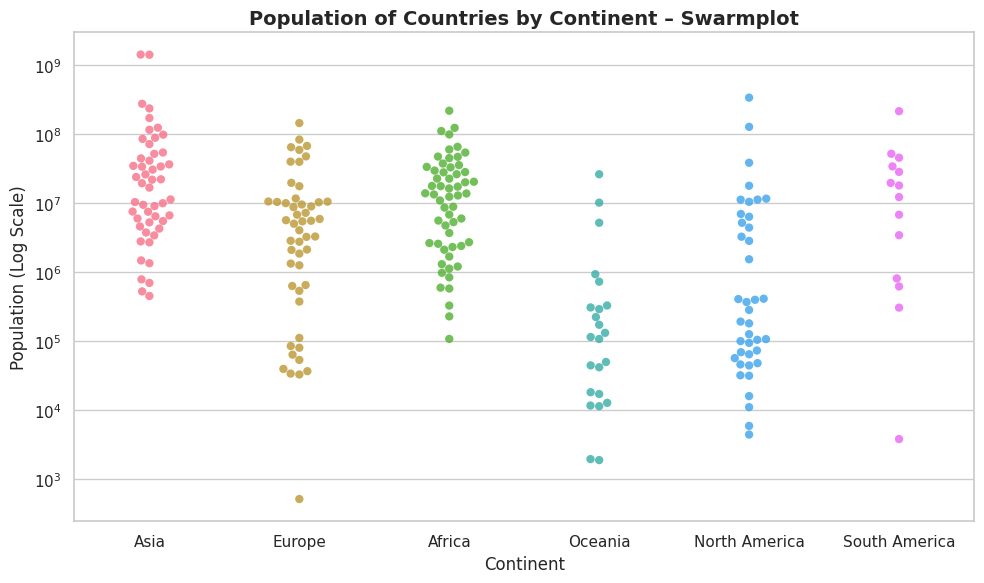

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.swarmplot(
    data=df,
    x='Continent',
    y='2022 Population',
    palette='husl',
    size=6,
    alpha=0.8
)
plt.yscale('log')

plt.title('Population of Countries by Continent – Swarmplot', fontsize=14, fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('Population (Log Scale)')

plt.tight_layout()
plt.show()

This swarmplot shows each country as a dot, revealing the range and density of population values in every continent. Asia has several extremely high-population countries as well as many mid-sized ones. Oceania shows tightly clustered low populations. This visualization emphasizes the diversity within continents, not just between them.

In [ ]:
top_area = df.sort_values(by='Area', ascending=False).head(10)

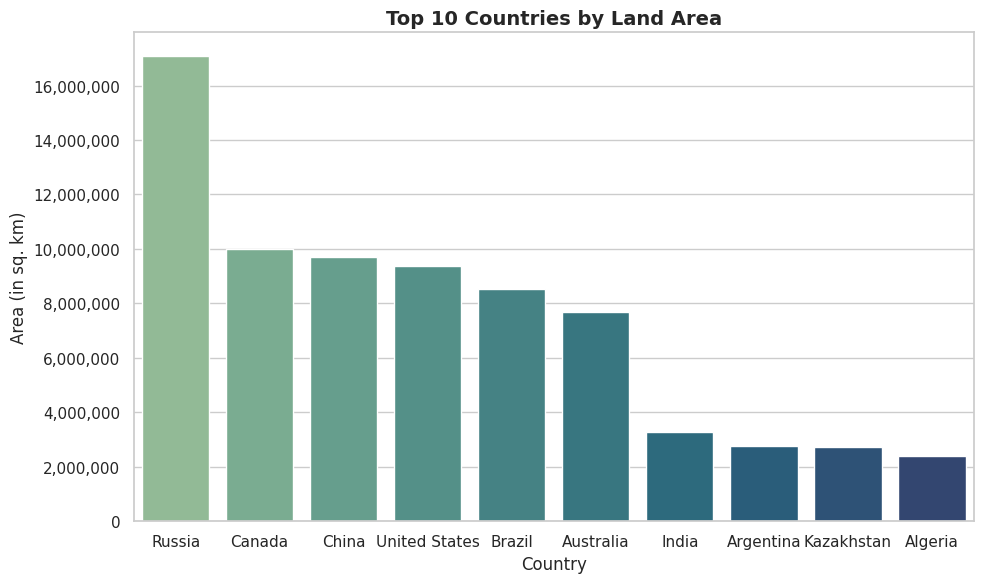

In [ ]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

sns.barplot(
    data=top_area,
    x='Country',
    y='Area',
    palette='crest'
)

plt.title('Top 10 Countries by Land Area', fontsize=14, fontweight='bold')
plt.xlabel('Country')
plt.ylabel('Area (in sq. km)')

import matplotlib.ticker as ticker
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.tight_layout()
plt.show()

The largest countries by land area are Russia, Canada, China, USA, and Brazil, each occupying millions of square kilometers. Despite their size, not all are densely populated — for example, Canada and Australia have vast land with low population density. This insight highlights the importance of land availability versus population pressure.



In [ ]:
continent_pop = df.groupby('Continent')['2022 Population'].sum().reset_index()

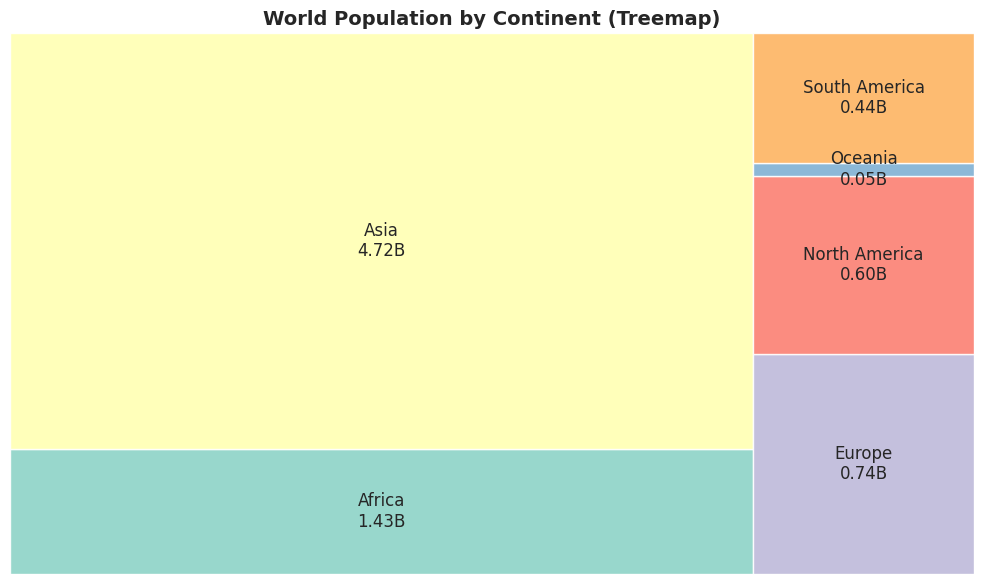

In [ ]:
sizes = continent_pop['2022 Population']
labels = [f"{c}\n{p/1e9:.2f}B" for c, p in zip(continent_pop['Continent'], sizes)]

plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, color=sns.color_palette('Set3'), alpha=0.9)

plt.title('World Population by Continent (Treemap)', fontsize=14, fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.show()

This treemap shows that Asia accounts for the majority of the world’s population, followed by Africa and the Americas. Europe and Oceania contribute the least. The block sizes clearly represent how disproportionate global population distribution is, even though landmass might suggest otherwise.



In [ ]:
cont_summary = df.groupby('Continent')[['2022 Population', 'Area']].sum().reset_index()
cont_summary['Pop Density'] = cont_summary['2022 Population'] / cont_summary['Area']

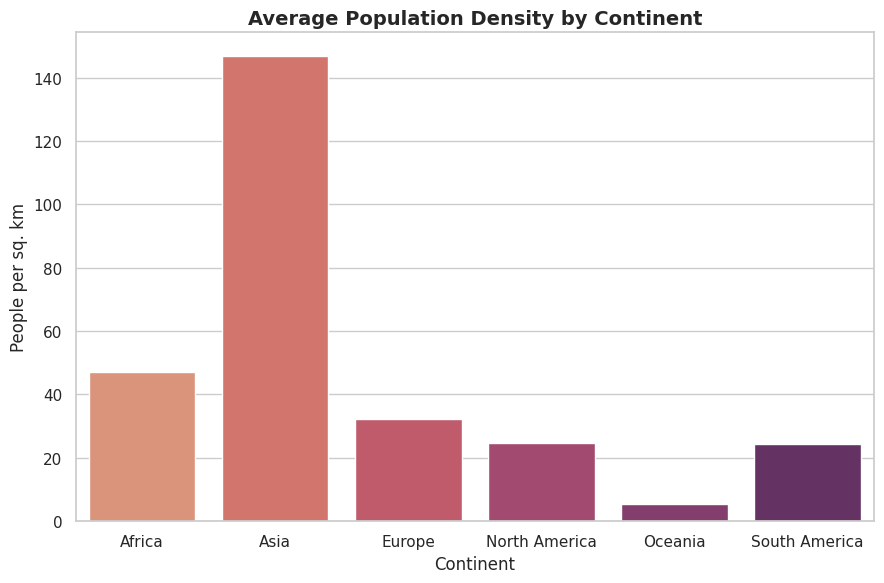

In [ ]:
plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")

sns.barplot(
    data=cont_summary,
    x='Continent',
    y='Pop Density',
    palette='flare'
)

plt.title('Average Population Density by Continent', fontsize=14, fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('People per sq. km')

plt.tight_layout()
plt.show()

Asia has the highest average population density among all continents, followed closely by Europe and Africa. In contrast, Oceania and the Americas are much more sparsely populated relative to their land area. This shows how not just size, but density shapes the experience of living in different parts of the world.

In [ ]:
continent_share = df.groupby('Continent')['2022 Population'].sum().reset_index()

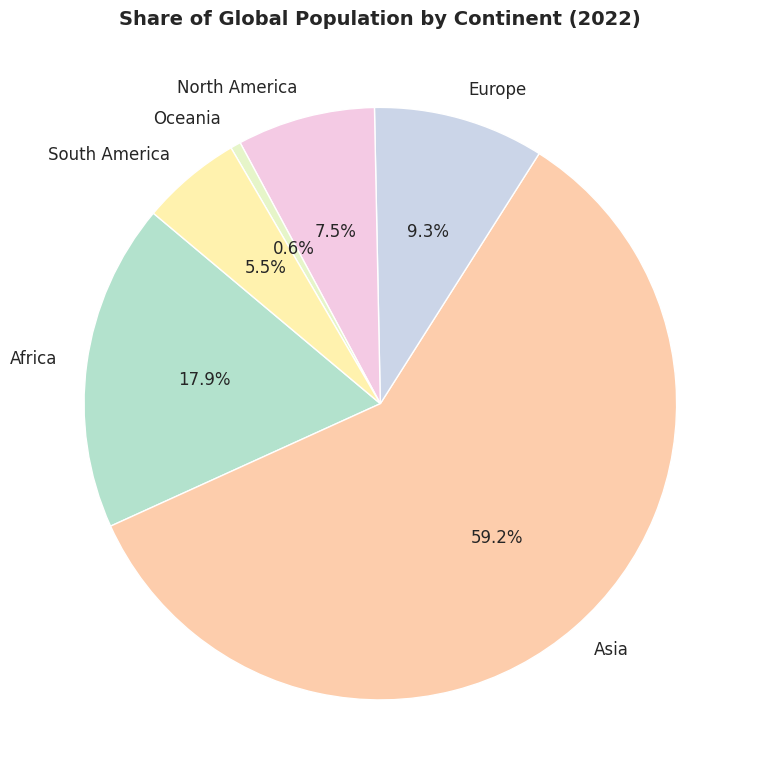

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(
    continent_share['2022 Population'],
    labels=continent_share['Continent'],
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Pastel2.colors,
    textprops={'fontsize': 12}
)

plt.title('Share of Global Population by Continent (2022)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

The majority of the world’s population lives in Asia, accounting for over 50% of global population. Africa follows, with a rising demographic curve. The Americas together account for a significant share, while Europe and Oceania make up the smallest portions.

This closing insight offers a global view — showing how humanity is distributed across the continents we call home.